# [**Data analysis with Python and SQL**](#Table-of-contents)

The Python and SQL are two of the necessary skills people should master through data analysis. We would like to practice Python and SQL in tandem on this project, with some basic business problems. Interpret data with data tables, plots/charts, or dashboard.

This project addresses the following 3 topics:

    How to analyse data with Python and/or SQL effectively from end to end;
    What are handy data analysis/engineering tools for Python developers;
    How to build dashboard quickly and eaisly.


<center><img src=./assets/grafana_dashboard1.png width="60%"/></center>


First, let's have a look at the tools which we would use.

* **Pandas**: Python library for data manipulation and analysis. We use Pandas to extract rawdata, create DataFrames, clean data, transform DataFrames, calculate aggregation results and finally visualise the results with Matplotlib and Seaborn.
* **PostgreSQL**: Powerful relational database management system (RDBMS). We will focus on PostgreSQL database as our local storage, create, connect to, and manage it using psycopg2.
* **psycopg2**: Probably the most popular PostgreSQL database adapter for Python.
* **Apache Spark**: A unified computational engine for executing large-scale data engineering, data science, and machine learning. We would use Spark SQL module in this demo project for structured data manipulation and analysis with pyspark.
* **pyspark**: Apache Spark's Python API.
* **Polars**: Fast DataFrame library for manipulating structured data. Similar to Pandas. We also give it a try for demonstrating data manipulation and analysis.
* **Grafana**: A visualization and analytics software. It allows user to query, visualize, explore metrics, logs. We build our dashboard with Grafana and PostgreSQL.
* **Matplotlib** and **Seaborn**: Popular tools for visualization. We would plot our Pandas DataFrames with these libraries. 

Ready for the challenge? Let’s get started!

## [**Table of contents**](#Data-analysis-with-Python-and-SQL )

* [**1 Data Exploration**](#1-Data-Exploration)
* [**2 Create Database**](#2-Create-Database)
* [**3 Business questions we will answer by data**](#3-Business-questions-we-will-answer-by-data)
    * [**3.1 Get answers with pandas**](#3.1-Get-answers-with-pandas)
    * [**3.2 Get answers with SQL**](#3.2-Get-answers-with-SQL)
    * [**3.3 Get answers with pyspark**](#3.3-Get-answers-with-pyspark)
    * [**3.4 Get answers with polars**](#3.4-Get-answers-with-polars)
    * [**3.5 Get answers with Grafana**](#3.5-Get-answers-with-Grafana)
* [**4 Summary**](#4-Summary)

## [**1 Data Exploration**](#Table-of-contents)

In [1]:
import pandas as pd
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
pd.options.display.max_colwidth = 80
import os
import json

Total **5** csv files from directory **`./data`**, as our data source. Only one 'null' item from 'customers.csv'

There are 8 categories from file **`'categories.csv'`**. The column 'Category Name' is what we needed. And 'Category ID' would be used as key to join with other dataframe or table. Column 'Description' is not used.

In [2]:
# Extract csv to DataFrame
cat = pd.read_csv('data/categories.csv')
cat

,Category ID,Category Name,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, and seasonings"
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


No null/empty items in this file.

In [3]:
# Get summary of DataFrame
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category ID    8 non-null      int64 
 1   Category Name  8 non-null      object
 2   Description    8 non-null      object
dtypes: int64(1), object(2)
memory usage: 320.0+ bytes


**`customers.csv`** has 7 columns: 'Customer ID', 'Customer Name', 'Contact Name', 'Address', 'City', 'Postal Code', 'Country'. We use 2 of them 'Customer ID' and 'Country'.

In [4]:
# Extract csv to DataFrame
cus = pd.read_csv('data/customers.csv')
cus

,Customer ID,Customer Name,Contact Name,Address,City,Postal Code,Country
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constitucion 2222,Mexico D.F.,05021,Mexico
2,3,Antonio Moreno Taquera,Antonio Moreno,Mataderos 2312,Mexico D.F.,05023,Mexico
3,4,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK
4,5,Berglunds snabbkoep,Christina Berglund,Berguvsvegen 8,Lulea,S-958 22,Sweden
...,...,...,...,...,...,...,...
86,87,Wartian Herkku,Pirkko Koskitalo,Torikatu 38,Oulu,90110,Finland
87,88,Wellington Importadora,Paula Parente,"Rua do Mercado, 12",Resende,08737-363,Brazil
88,89,White Clover Markets,Karl Jablonski,305 - 14th Ave. S. Suite 3B,Seattle,98128,USA
89,90,Wilman Kala,Matti Karttunen,Keskuskatu 45,Helsinki,21240,Finland


In [5]:
# Get summary of DataFrame
cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer ID    91 non-null     int64 
 1   Customer Name  91 non-null     object
 2   Contact Name   91 non-null     object
 3   Address        91 non-null     object
 4   City           91 non-null     object
 5   Postal Code    90 non-null     object
 6   Country        91 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.1+ KB


The only missing data of our dataset.

In [6]:
# Get entry with 'NaN' item
cus[cus['Postal Code'].isnull()]

,Customer ID,Customer Name,Contact Name,Address,City,Postal Code,Country
36,37,Hungry Owl All-Night Grocers,Patricia McKenna,8 Johnstown Road,Cork,NaN,Ireland


**`orders.csv`** has 3 columns: 'Order ID', 'Customer ID' and 'Order Date'. It gives us a high level information about each order.

In [7]:
# Extract csv to DataFrame
ods = pd.read_csv('data/orders.csv')
ods

,Order ID,Customer ID,Order Date
0,10248,90,"July 4, 2021"
1,10249,81,"July 5, 2021"
2,10250,34,"July 8, 2021"
3,10251,84,"July 8, 2021"
4,10252,76,"July 9, 2021"
...,...,...,...
825,11073,58,"May 5, 2023"
826,11074,73,"May 6, 2023"
827,11075,68,"May 6, 2023"
828,11076,9,"May 6, 2023"


In [8]:
# Get summary of DataFrame
ods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Order ID     830 non-null    int64 
 1   Customer ID  830 non-null    int64 
 2   Order Date   830 non-null    object
dtypes: int64(2), object(1)
memory usage: 19.6+ KB


**`orders_details.csv`** as a supplement to orders, provides two more columns: 'Product ID' and 'Quantity'.

In [9]:
# Extract csv to DataFrame
odd = pd.read_csv('data/orders_details.csv')
odd

,Order Detail ID,Order ID,Product ID,Quantity
0,1,10248,11,12
1,2,10248,42,10
2,3,10248,72,5
3,4,10249,14,9
4,5,10249,51,40
...,...,...,...,...
2150,2151,11077,64,2
2151,2152,11077,66,1
2152,2153,11077,73,2
2153,2154,11077,75,4


In [10]:
# Get summary of DataFrame
odd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Order Detail ID  2155 non-null   int64
 1   Order ID         2155 non-null   int64
 2   Product ID       2155 non-null   int64
 3   Quantity         2155 non-null   int64
dtypes: int64(4)
memory usage: 67.5 KB


**`products.csv`** includes product information, such as name, price, category and unit.

In [11]:
# Extract csv to DataFrame
prd = pd.read_csv('data/products.csv')
prd

,Product ID,Product Name,Category ID,Unit,Price
0,1,Chais,1,10 boxes x 20 bags,18.00
1,2,Chang,1,24 - 12 oz bottles,19.00
2,3,Aniseed Syrup,2,12 - 550 ml bottles,10.00
3,4,Chef Antons Cajun Seasoning,2,48 - 6 oz jars,22.00
4,5,Chef Antons Gumbo Mix,2,36 boxes,21.35
...,...,...,...,...,...
72,73,Red Kaviar,8,24 - 150 g jars,15.00
73,74,Longlife Tofu,7,5 kg pkg.,10.00
74,75,Rhenbreu Klosterbier,1,24 - 0.5 l bottles,7.75
75,76,Lakkalikeeri,1,500 ml,18.00


In [12]:
# Get summary of DataFrame
prd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product ID    77 non-null     int64  
 1   Product Name  77 non-null     object 
 2   Category ID   77 non-null     int64  
 3   Unit          77 non-null     object 
 4   Price         77 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.1+ KB


So far we had get a feel for the dataset. It's time to think about saveing our data into a database.

## [**2 Create Database**](#Table-of-contents)

Create database 'retailerdb' with PostgresSQL and insert dataset by 'psycopg2'.

In [13]:
# logging output and capture error
import logging

# Create logger
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

# Create formatter
formatter = logging.Formatter('%(asctime)s:%(name)s:%(message)s')

# Create file handler
fh = logging.FileHandler('retailer.log')
# Set level to error
fh.setLevel(logging.ERROR)
# Add formatter to file handler
fh.setFormatter(formatter)

# Create console handler
ch = logging.StreamHandler()
# Set level to debug
ch.setLevel(logging.DEBUG)
# Add formatter to console handler
ch.setFormatter(formatter)

# Add handlers to logger
logger.addHandler(ch)
logger.addHandler(fh)

In [14]:
# Create database
import psycopg2
from psycopg2 import sql
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

# Get database configuration
db_config = {'dbname':'postgres',
             'host':'127.0.0.1',
             'port':'5432',
             'user':'albert',
             'password':'demouser'}

try:
    # Establish connection to database
    logger.debug(f'Establish connection to database')
    con = psycopg2.connect(**db_config)
    con.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
    
    # Create a cursor object to interact with database
    cur = con.cursor()
    
    # Create database
    logger.debug(f'Create database start')
    cur.execute(sql.SQL("CREATE DATABASE {}").format(sql.Identifier('retailerdb')))
    logger.debug(f'Create database finished')

except (Exception, psycopg2.Error) as error:
    # print error on screen and write error into log
    logger.exception(f'database operation failed: {error}')

finally:
    # Close cursor and connection
    if con:
        cur.close()
        con.close()
        logger.debug(f'database connection closed')

2024-12-02 07:36:26,783:__main__:Establish connection to database
2024-12-02 07:36:26,838:__main__:Create database start
2024-12-02 07:36:27,032:__main__:Create database finished
2024-12-02 07:36:27,034:__main__:database connection closed


In [15]:
# Copy csv into database
# This procedure is part of ELT(Extract, Load, Transform) processes.
# Later in pyspark/Spark section, we will use PostgreSQL as data 
# source, then transform Spark DataFrame to expected answers.
import psycopg2
from psycopg2 import sql
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
import os
import json

# Get database configuration
path_to_config = os.path.join(os.getcwd(), 'configs/', 'db_config.json')
with open(path_to_config, 'r') as config_file:
    db_config = json.load(config_file)

try:
    # Establish connection to database
    logger.debug(f'Establish connection to database')
    con = psycopg2.connect(**db_config)
    con.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
    
    # Create a cursor object to interact with database
    cur = con.cursor()
    
    # SQL statements for creating tables
    logger.debug(f'database operations: create tables and copy csv data. start')
    sql_list = [sql.SQL("CREATE TABLE IF NOT EXISTS categories (category_id SERIAL NOT NULL PRIMARY KEY, category_name VARCHAR(255), description VARCHAR(255));"), 
                sql.SQL("CREATE TABLE IF NOT EXISTS products (product_id SERIAL NOT NULL PRIMARY KEY, product_name VARCHAR(255), category_id INT, unit VARCHAR(255), price DECIMAL(10, 2));"), 
                sql.SQL("CREATE TABLE IF NOT EXISTS customers (customer_id SERIAL NOT NULL PRIMARY KEY, customer_name VARCHAR(255), contact_name VARCHAR(255), address VARCHAR(255), city VARCHAR(255), postal_code VARCHAR(255), country VARCHAR(255));"), 
                sql.SQL("CREATE TABLE IF NOT EXISTS orders (order_id SERIAL NOT NULL PRIMARY KEY, customer_id INT, order_date DATE);"), 
                sql.SQL("CREATE TABLE IF NOT EXISTS orders_details (order_detail_id SERIAL NOT NULL PRIMARY KEY, order_id INT, product_id INT, quantity INT);")
               ]
    
    # csv file list
    csv_list = ['categories.csv', 'products.csv', 'customers.csv', 'orders.csv', 'orders_details.csv']
    
    # Create tables and insert data into tables
    for csv_file,sql_cmd in zip(csv_list, sql_list):
        table_name = str.split(csv_file, sep='.')[0]
        # Create table
        logger.debug(f'Create table {table_name}, start')
        cur.execute(sql_cmd)
        logger.debug(f'Create table {table_name}, finished')
        
        # Copy csv into database
        logger.debug(f'Copy csv data to table {table_name}, start')                    
        cur.copy_expert(sql.SQL("COPY {} FROM STDIN DELIMITER ',' CSV HEADER").format(sql.Identifier(table_name)), open(os.path.join('data', csv_file), "r"))
        logger.debug(f'Copy csv data to table {table_name}, finished')
        
    logger.debug(f'database operations: create tables and copy csv data. finished')
    
    # List available tables
    logger.debug(f'database operation: list available tables. start')
    print('Available tables:')
    cur.execute(sql.SQL("SELECT table_name FROM information_schema.tables WHERE table_schema = 'public';"))
    for i in cur.fetchall(): 
        print(i) 
    logger.debug(f'database operation: list available tables. finished')

except (Exception, psycopg2.Error) as error:
    # print error on screen and write error into log
    logger.exception(f'database connection failed: {error}')

finally:
    # Close cursor and connection
    if con:
        cur.close()
        con.close()
        logger.debug(f'Close database connection')

2024-12-02 07:36:31,699:__main__:Establish connection to database
2024-12-02 07:36:31,715:__main__:database operations: create tables and copy csv data. start
2024-12-02 07:36:31,716:__main__:Create table categories, start
2024-12-02 07:36:31,736:__main__:Create table categories, finished
2024-12-02 07:36:31,737:__main__:Copy csv data to table categories, start
2024-12-02 07:36:31,744:__main__:Copy csv data to table categories, finished
2024-12-02 07:36:31,745:__main__:Create table products, start
2024-12-02 07:36:31,760:__main__:Create table products, finished
2024-12-02 07:36:31,763:__main__:Copy csv data to table products, start
2024-12-02 07:36:31,768:__main__:Copy csv data to table products, finished
2024-12-02 07:36:31,771:__main__:Create table customers, start
2024-12-02 07:36:31,779:__main__:Create table customers, finished
2024-12-02 07:36:31,784:__main__:Copy csv data to table customers, start
2024-12-02 07:36:31,791:__main__:Copy csv data to table customers, finished
2024-12

Available tables:
('categories',)
('products',)
('customers',)
('orders',)
('orders_details',)


## [**3 Business questions we will answer by data**](#Table-of-contents)

Get answers to the following questions, with popular tools.

* **Part1: Overall business health**
  * 1 Question: Revenue per quarter
  * 2 Question: Number of orders per month
  * 3 Question: Unique customers per month
  * 4 Question: Revenue and orders over time
  * 5 Question: Number of orders by country per quarter
  * 6 Question: Value of orders over time
* **Part2: Top performing products**
  * 7 Question: Best selling products
  * 8 Question: Top three all-time products
* **Part3: Product category insights**
  * 9 Question: Number of orders by category per quarter
  * 10 Question: Total orders by category

This section is divided into 5 parts. In each part we will focus on one specific tool to answer our business questions which we just mentioned above.

First, Pandas shows it's capacity and efficiency for data manipulation and analysis. We also seamlessly run it with popular visualization tools like Matplotlib and Seaborn. The solution is quite straightforward. Pandas reads 5 csv files as our dataset and generates corresponding DataFrame respectively. Then transforms 5 DataFrames into one big DataFrame. Manipulates the big DataFrame to get answers. Next we plot these answers with Matplotlib or Seaborn.

Followed by SQL part. We get answers easily with PostgreSQL by psycopg2.

The third part, Apache Spark proves itself as a powerful engine. pyspark helps us to work effectively with both Python and SQL solutions. Spark also gives us many options while reading and writing data. At the end of this part we try to write DataFrame into Delta Lake table and read it back.

Next we will try a relevant new tool Polars. It's similar to Pandas. Delta Lake table as data source instead of csv, in this part.

At last, we build fancy dashboard with Grafana and PostgreSQL.

### [**3.1 Get answers with pandas**](#Table-of-contents)

#### [**Utilities**](#3.1-Get-answers-with-pandas)

In [16]:
############################################################
# calculate 'pct_change' and 'diff'
############################################################
def pct_change_diff(df, col, fun='sum', *, col_rename=None):
    """Calculate pct_change and diff of a column.
    :param df: Input DataFrame.
    :param col: Column name.
    :param fun: agg functions, such as 'sum' or 'nunique'. Defalut is 'sum'.
    :param col_rename: New column name. Default is None. 
    :return: A new DataFrame.
    """
    col_rename = col if col_rename is None else col_rename
    temp = df.agg(fun)
    return (pd.merge(temp, temp.agg([pd.DataFrame.pct_change, 
                                     pd.DataFrame.diff]).xs(col, level=0, axis=1), 
                    left_index=True, right_index=True)
            .rename(columns={col:col_rename}))

############################################################
# Table Visualization function
############################################################
def custom_table(styler):
    """Formatting the Display.
    :styler: styler
    :return: custom styler
    """
    styler.background_gradient(cmap="Reds", axis=None)
    styler.format(precision=2)
    # center text and increase font size
    styler.map(lambda x: 'text-align: center; font-size: 14px;') 
    return styler

############################################################
# custom EngFormatter
############################################################
import matplotlib.ticker as ticker

class myEngFormatter(ticker.EngFormatter):
    def __init__(self, myprefix="$"):
        super().__init__()
        # Add 'myprefix' option.
        self.myprefix = myprefix

    def __call__(self, x, pos=None):
        # Add 'myprefix' to default format.
        s = f"{self.myprefix}{self.format_eng(x)}{self.unit}"
        # Remove the trailing separator when there is neither prefix nor unit
        if self.sep and s.endswith(self.sep):
            s = s[:-len(self.sep)]
        return self.fix_minus(s)

ticker.myEngFormatter = myEngFormatter

############################################################
# Add footnote at the bottom of the chart
############################################################
def ax_footnote(ax, xy=(0.8, -0.3)):
    """Add footnote at the bottom of the chart
    :param ax: Input DataFrame.
    :param xy: Coordinates.
    :return: None.
    """
    footnote = ['Data: demo', 'Design: demo']
    ax.annotate('\n'.join(footnote), fontsize=10, style='italic',
                xy=xy, xycoords=ax, ha='left', va='top',
                bbox=dict(boxstyle='square,pad=0',fc='none', ec='none'))

############################################################
# Add footnote at the bottom of the chart
############################################################
def fig_footnote(fig, x=0.8, y=-0.02):
    """Add footnote at the bottom of the chart
    :param fig: Input DataFrame.
    :param x: X coordinate.
    :param y: Y coordinate.
    :return: None.
    """
    footnote=['Data: demo','Design: demo']
    fig.text(x, y, '\n'.join(footnote), color='black', fontsize=10,
             style='italic', va='bottom', ha='left')

############################################################
# plot line chart
############################################################
def plot_line(df, *, col='Revenue', title='line chart', xlabel='Date', ylabel='Revenue', 
              figsize=(10, 5), footnote=True, savefig=False):
    """Plot a line chart
    :param df: Input DataFrame.
    :param col: Column name, default 'Revenue'.
    :param title: Title of plot, default 'line chart'. 
    :param xlabel: X lbel, default 'Date'.
    :param ylabel: Y lbel, default 'Revenue'.
    :param figsize: Figure size, default (10, 5).
    :param footnote: boolean, default True.
    :param savefig: boolean, default False.
    :return: None.
    """
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(1, 1, figsize=figsize, layout='tight')
    # Set title and labels
    fig.suptitle(title, ha="center", weight='bold', size=16)
    fig.autofmt_xdate()
    ax.set_xlabel(xlabel, weight='bold', size=14)
    ax.set_ylabel(ylabel, weight='bold', size=14)
    
    # Set the background color
    ax.set_facecolor('seashell')
    fig.set_facecolor('seashell')

    # Plot line chart
    ax.plot(df.index.astype('str'), df[col], lw=1.5, 
            marker='o', markerfacecolor='red', markeredgecolor='blue')
    
    # Removes spines
    ax.spines[:].set_visible(False)
    
    # Add tick lines across the plot
    ax.grid(True, ls='--', lw=.5, c='k', alpha=.5)
    
    # Remove tick marks
    ax.tick_params(axis='both', which='both', labelsize='large', 
                   bottom=False, top=False, labelbottom=True, 
                   left=False, right=False, labelleft=True)

    # Set formatter
    if col == 'Revenue':
        # Revised EngFormatter base on matplotlib.ticker.EngFormatter
        # add 'myprefix' option
        ax.yaxis.set_major_formatter(ticker.myEngFormatter())
    else:
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

    # Add footnote at the bottom of the chart
    if footnote:
        ax_footnote(ax, xy=(0.8, -0.3))

    # Save figure as a pdf
    if savefig:
        fig.savefig(f'{title}.pdf', bbox_inches='tight', dpi=300, 
                    pad_inches=0.1)
        
    plt.show()

############################################################
# plot bar chart
############################################################
def plot_bar(df, *, col='Revenue', title='bar chart', xlabel='Date', ylabel='Revenue', 
             figsize=(10, 5), footnote=True, savefig=False):
    """Plot a bar chart
    :param df: Input DataFrame.
    :param col: Column name, default 'Revenue'.
    :param title: Title of plot, default 'bar chart'. 
    :param xlabel: X lbel, default 'Date'.
    :param ylabel: Y lbel, default 'Revenue'.
    :param figsize: Figure size, default (10, 5).
    :param footnote: boolean, default True.
    :param savefig: boolean, default False.
    :return: None.
    """
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(1, 1, figsize=figsize, layout='tight')
    # Set title and labels
    fig.suptitle(title, ha="center", weight='bold', size=16)
    fig.autofmt_xdate()
    ax.set_xlabel(xlabel, weight='bold', size=14)
    ax.set_ylabel(ylabel, weight='bold', size=14)

    # Set the background color
    ax.set_facecolor('seashell')
    fig.set_facecolor('seashell')

    # Plot bar chart
    ax.bar(df.index.astype('str'), df[col],
          color='#FE4E1C', edgecolor="#FE4E1C", alpha=1.0, width=0.5,
          zorder=2, # specify that the bars is drawn after the grid
          )

    # Removes spines
    ax.spines[:].set_visible(False)

    # Add tick lines across the plot
    ax.grid(True, axis='y', ls='--', lw=.5, c='dimgrey', alpha=.3)

    # Remove tick marks
    ax.tick_params(axis='both', which='both', labelsize='large',
                   bottom=False, top=False, labelbottom=True,
                   left=False, right=False, labelleft=True)
    # Set formatter
    if col == 'Revenue':
        # Revised EngFormatter base on matplotlib.ticker.EngFormatter
        # add 'myprefix' option
        ax.yaxis.set_major_formatter(ticker.myEngFormatter())
    else:
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

    # Add footnote at the bottom of the chart
    if footnote:
        ax_footnote(ax, xy=(0.8, -0.3))

    # Save figure as a pdf
    if savefig:
        fig.savefig(f'{title}.pdf', bbox_inches='tight', dpi=300,
                    pad_inches=0.1)

    plt.show()

############################################################
# plot heatmap
############################################################
def plot_heatmap(df, *, title='heatmap', xlabel='Date', ylabel='Country', 
                 cbar_label='Number of Orders', figsize=(12, 6), 
                 footnote=True, savefig=False):
    """Plot a heatmap chart
    :param df: Input DataFrame.
    :param title: Title of plot, default 'heatmap'.
    :param xlabel: X lbel, default 'Date'.
    :param ylabel: Y lbel, default 'Revenue'.
    :param cbar_label: Color bar label, default 'Number of Orders'.
    :param figsize: Figure size, default (12, 6).
    :param footnote: boolean, default True.
    :param savefig: boolean, default False.
    :return: None.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    fig, ax = plt.subplots(figsize=figsize,  layout='tight')
    # Set the background color
    ax.set_facecolor('seashell')
    fig.set_facecolor('seashell')

    # Set ticker format, according to keywords in color bar label.
    kwords = ['value', 'revenue']
    if any([i in cbar_label.lower() for i in kwords]):
        ticker_fmt = ticker.myEngFormatter()
        fmt = '.2f'
    else:
        ticker_fmt = ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}')
        fmt = 'd'
        
    # Plot heatmap
    sns.heatmap(df, annot=True, fmt=fmt, linewidths=0.5, ax=ax, cmap='Reds',
                cbar_kws=dict(label=cbar_label, aspect=30, format=ticker_fmt))

    # Tweak the supporting aspects of the plot
    ax.set_title(title, pad=20,size=20, weight='bold')
    ax.set_xlabel(xlabel, weight='bold', size=14)
    ax.set_ylabel(ylabel, weight='bold', size=14)
    fig.autofmt_xdate()

    # Add footnote at the bottom of the chart
    fig_footnote(fig, x=0.8, y=-0.02)

    # Save figure as a pdf
    if savefig:
        fig.savefig(f'{title}.pdf', bbox_inches='tight', dpi=300, 
                    pad_inches=0.1)

    plt.show()

#### [**Extract data from csv, then load extracted data into Delta Lake table**](#3.1-Get-answers-with-pandas)

In [17]:
# Create Pandas DataFrame then write to Delta Lake table
# This procedure is part of ELT(Extract, Load, Transform) processes.
# Later in Polars section, we will read Delta Lake table as data
# source, then transform Polars DataFrame to expected answers.

from deltalake import write_deltalake

for i in os.listdir('data'):
    if i.endswith('csv'):
        name = str.split(i, sep='.')[0]
        print(f'Extract data from csv to Pandas DataFrame: {name}')
        # Extract csv into Pandas DataFrame
        globals()[name] = pd.read_csv(os.path.join(os.path.curdir, 'data', i))
        
        print(f'Load Pandas DataFrame: {name} to Delta Lake table')
        # Write Pandas DataFrame to Delta Lake table
        write_deltalake(os.path.join(os.path.curdir, 'data/delta/', name), 
                        globals()[name], 
                        mode='overwrite')

Extract data from csv to Pandas DataFrame: products
Load Pandas DataFrame: products to Delta Lake table
Extract data from csv to Pandas DataFrame: orders
Load Pandas DataFrame: orders to Delta Lake table
Extract data from csv to Pandas DataFrame: orders_details
Load Pandas DataFrame: orders_details to Delta Lake table
Extract data from csv to Pandas DataFrame: categories
Load Pandas DataFrame: categories to Delta Lake table
Extract data from csv to Pandas DataFrame: customers
Load Pandas DataFrame: customers to Delta Lake table


#### [**Transform data to desired DataFrame**](#3.1-Get-answers-with-pandas)

In [18]:
# Merge dataframes and create auxiliary columns.

# Merge dataframe orders, orders_details and product together.
df = (orders.pipe(pd.merge, right=orders_details, on='Order ID')
            .pipe(pd.merge, right=products, on='Product ID')
     )

# Change datatype of 'Order Date' column from str to datetime.
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed')

# Map 'Category Name' from 'Category ID'.
cat_map = {i:j for i,j in categories[['Category ID', 'Category Name']].values}
df['Category Name'] = df['Category ID'].map(cat_map)

# Map 'Customer Name', 'City', 'Country' from 'Customer ID'.
cus_map = {i:j for i,*j in customers[['Customer ID', 'Customer Name', 'City', 'Country']].values}
df['Customer Name'], df['City'], df['Country'] = zip(*df['Customer ID'].map(cus_map))

# Re-order columns
df = df[['Order Date', 'Order ID',
         'Product ID', 'Product Name',
         'Category ID', 'Category Name',
         'Customer ID', 'Customer Name', 'City', 'Country',
         'Price','Quantity']]

# Calculate bill.
df['Value'] =  df['Price'] * df['Quantity']

# Create auxiliary columns 'Month' and 'Quarter' for groupby operations.
df['Month'] = pd.PeriodIndex(df['Order Date'], freq='M')
df['Quarter'] = pd.PeriodIndex(df['Order Date'], freq='Q')

# Review desired Datafreme.
df[:5]

,Order Date,Order ID,Product ID,Product Name,Category ID,Category Name,Customer ID,Customer Name,City,Country,Price,Quantity,Value,Month,Quarter
0,2021-07-04,10248,11,Queso Cabrales,4,Dairy Products,90,Wilman Kala,Helsinki,Finland,21.00,12,252.00,2021-07,2021Q3
1,2021-07-04,10248,42,Singaporean Hokkien Fried Mee,5,Grains/Cereals,90,Wilman Kala,Helsinki,Finland,14.00,10,140.00,2021-07,2021Q3
2,2021-07-04,10248,72,Mozzarella di Giovanni,4,Dairy Products,90,Wilman Kala,Helsinki,Finland,34.80,5,174.00,2021-07,2021Q3
3,2021-07-05,10249,14,Tofu,7,Produce,81,Tradicao Hipermercados,Sao Paulo,Brazil,23.25,9,209.25,2021-07,2021Q3
4,2021-07-05,10249,51,Manjimup Dried Apples,7,Produce,81,Tradicao Hipermercados,Sao Paulo,Brazil,53.00,40,2120.00,2021-07,2021Q3


#### [**Part1: Overall business health with pandas**](#3.1-Get-answers-with-pandas)

##### [**3.1.1 Question: Revenue per quarter**](#Part1:-Overall-business-health-with-pandas)

In [19]:
# 3.1.1 Question: Revenue per quarter
# We have 2 solutions for this question:
#  1. group by 'PeriodIndex'(the 'Quarter' column)
#  2. set pandas datetime object (the 'Order Date' column) as index, then resample the index

# Solution 1 : group by 'PeriodIndex'
# This solution is faster then resample index solution.
df1 = df[['Quarter', 'Value']].groupby('Quarter')
df1 = pct_change_diff(df1, col='Value', col_rename='Revenue', fun='sum')
df1

,Revenue,pct_change,diff
Quarter,,,
2021Q3,105630.94,NaN,NaN
2021Q4,177413.91,0.679564,71782.97
2022Q1,184954.12,0.042501,7540.21
2022Q2,152699.24,-0.174394,-32254.88
2022Q3,165179.64,0.081732,12480.40
2022Q4,193718.12,0.172772,28538.48
2023Q1,315242.12,0.627324,121524.00
2023Q2,154529.22,-0.509808,-160712.90


In [20]:
# 3.1.1 Question: Revenue per quarter
# Solution 2 :  resample pandas datetime object
# This solution works well, but slightly slower than the above one.
df1 = df[['Value','Order Date']].set_index('Order Date').resample("QE",)
df1 = pct_change_diff(df1, col='Value', col_rename='Revenue', fun='sum').to_period()
df1

,Revenue,pct_change,diff
Order Date,,,
2021Q3,105630.94,NaN,NaN
2021Q4,177413.91,0.679564,71782.97
2022Q1,184954.12,0.042501,7540.21
2022Q2,152699.24,-0.174394,-32254.88
2022Q3,165179.64,0.081732,12480.40
2022Q4,193718.12,0.172772,28538.48
2023Q1,315242.12,0.627324,121524.00
2023Q2,154529.22,-0.509808,-160712.90


In [21]:
# Table Visualization
df1.style.pipe(custom_table)

,Revenue,pct_change,diff
Order Date,,,
2021Q3,105630.94,nan,nan
2021Q4,177413.91,0.68,71782.97
2022Q1,184954.12,0.04,7540.21
2022Q2,152699.24,-0.17,-32254.88
2022Q3,165179.64,0.08,12480.40
2022Q4,193718.12,0.17,28538.48
2023Q1,315242.12,0.63,121524.00
2023Q2,154529.22,-0.51,-160712.90


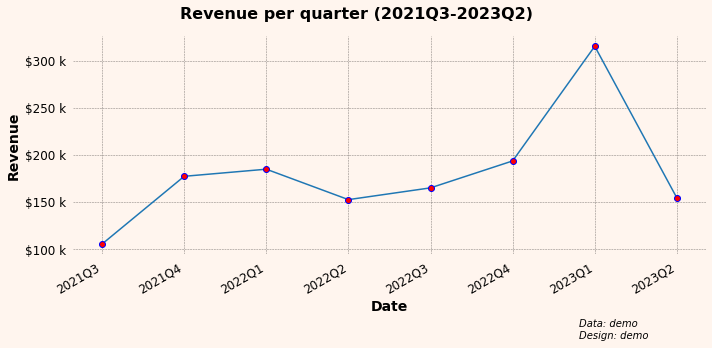

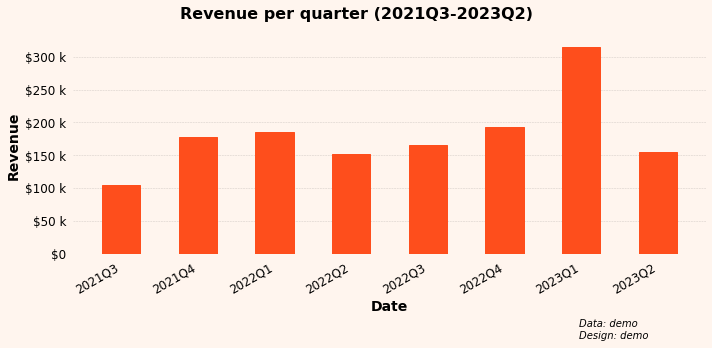

In [22]:
# Visualization with Matplotlib
df1_options={
    'title':'Revenue per quarter (2021Q3-2023Q2)',
    'ylabel':'Revenue'
}

plot_line(df1, **df1_options)
plot_bar(df1, **df1_options)

##### [**3.1.2 Question: Number of orders per month**](#Part1:-Overall-business-health-with-pandas)

In [23]:
# 3.1.2 Question: Number of orders per month
df2 = df[['Month', 'Quantity']].groupby('Month')
df2 = pct_change_diff(df2, col='Quantity', col_rename='Orders', fun='sum')
df2[:5]

,Orders,pct_change,diff
Month,,,
2021-07,1462,NaN,NaN
2021-08,1322,-0.095759,-140.0
2021-09,1124,-0.149773,-198.0
2021-10,1738,0.546263,614.0
2021-11,1735,-0.001726,-3.0


In [24]:
# Table Visualization
df2.style.pipe(custom_table)

,Orders,pct_change,diff
Month,,,
2021-07,1462,nan,nan
2021-08,1322,-0.10,-140.00
2021-09,1124,-0.15,-198.00
2021-10,1738,0.55,614.00
2021-11,1735,-0.00,-3.00
2021-12,2200,0.27,465.00
2022-01,2401,0.09,201.00
2022-02,2132,-0.11,-269.00
2022-03,1770,-0.17,-362.00


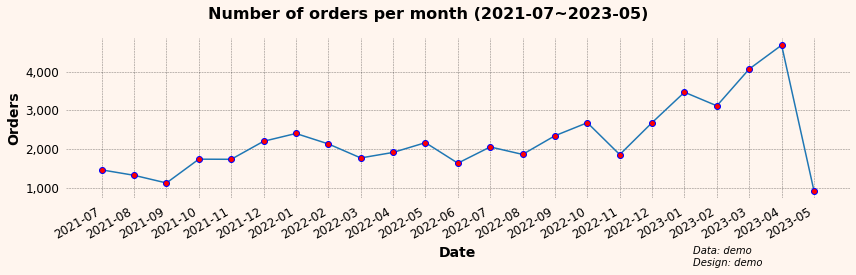

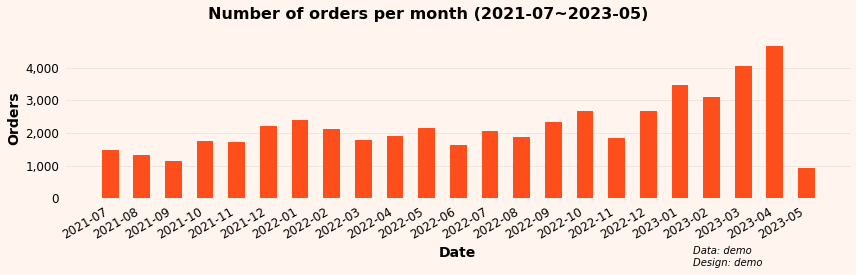

In [25]:
# Visualization with Matplotlib
df2_options={
    'col':'Orders',
    'title':'Number of orders per month (2021-07~2023-05)',
    'ylabel':'Orders', 
    'figsize':(12, 4),
}

plot_line(df2, **df2_options)
plot_bar(df2, **df2_options)

##### [**3.1.3 Question: Unique customers per month**](#Part1:-Overall-business-health-with-pandas)

In [26]:
# 3.1.3 Question: Unique customers per month
df3 = df[['Month', 'Customer ID']].groupby('Month')
df3 = pct_change_diff(df3, col='Customer ID', col_rename='Monthly_Customers', fun='nunique')
df3[:5]

,Monthly_Customers,pct_change,diff
Month,,,
2021-07,20,NaN,NaN
2021-08,18,-0.100000,-2.0
2021-09,19,0.055556,1.0
2021-10,20,0.052632,1.0
2021-11,21,0.050000,1.0


In [27]:
# Table Visualization
df3.style.pipe(custom_table)

,Monthly_Customers,pct_change,diff
Month,,,
2021-07,20,nan,nan
2021-08,18,-0.10,-2.00
2021-09,19,0.06,1.00
2021-10,20,0.05,1.00
2021-11,21,0.05,1.00
2021-12,25,0.19,4.00
2022-01,27,0.08,2.00
2022-02,21,-0.22,-6.00
2022-03,24,0.14,3.00


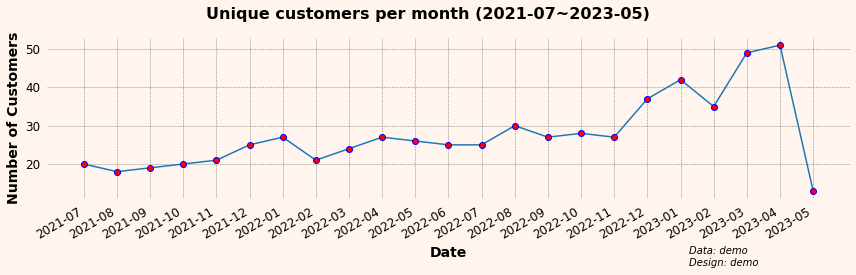

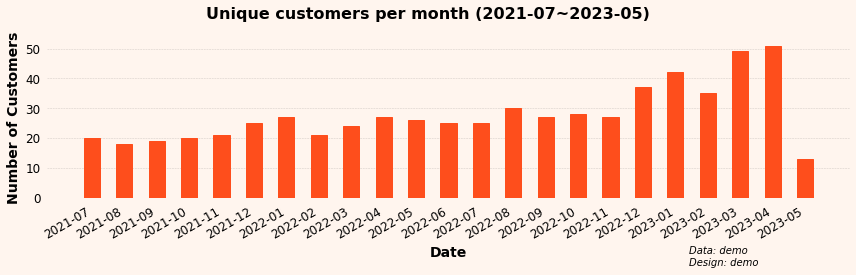

In [28]:
# Visualization with Matplotlib
df3_options={
    'col':'Monthly_Customers',
    'title':'Unique customers per month (2021-07~2023-05)',
    'ylabel':'Number of Customers',
    'figsize':(12, 4)
}

plot_line(df3, **df3_options)
plot_bar(df3, **df3_options)

##### [**3.1.4 Question: Revenue and orders over time**](#Part1:-Overall-business-health-with-pandas)

In [29]:
# 3.1.4 Question: Revenue and orders over time
df4 = (df[['Value','Quantity','Month']]
        .groupby('Month')
        .agg('sum')
        .rename(columns={'Value':'Revenue', 'Quantity':'Number of Orders'}))
df4[:5]

,Revenue,Number of Orders
Month,,
2021-07,37779.85,1462
2021-08,33285.49,1322
2021-09,34565.60,1124
2021-10,51528.69,1738
2021-11,62163.99,1735


In [30]:
# Correlation matrix visualization  
# Strong positive correlation between 'Revenue' and 'Number of Orders'.
# 'pearson' standard correlation coefficient

df4.corr().style.background_gradient(cmap='coolwarm', axis=None).format(precision=3)

,Revenue,Number of Orders
Revenue,1.000,0.968
Number of Orders,0.968,1.000


Following chart also depicts a strong positive correlation between 'Revenue' and 'Number of Orders'.

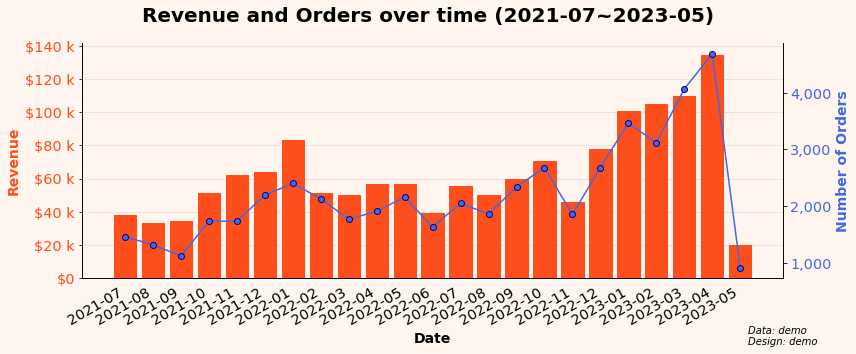

In [31]:
# Visualization with Matplotlib
from matplotlib import pyplot as plt

plt.close()
fig, ax1 = plt.subplots(figsize=(12, 5), layout='tight')
# Set the background color
fig.set_facecolor('seashell')
ax1.set_facecolor('seashell')

x = df4.index.astype('str')
y1 = df4['Revenue']
y2 =  df4['Number of Orders']
# plot line chart
plt.bar(x, y1, color='#FE4E1C', edgecolor="#FE4E1C", alpha=1.0, width=0.8,
        zorder=2, # specify that the bars is drawn after the grid
       )
ax1.set_xlabel("Date", color='black', fontsize=14, weight='bold')
ax1.set_ylabel("Revenue", color='#FE4E1C', fontsize=14, weight='bold')
ax1.tick_params(axis='y', labelcolor='#FE4E1C')
ax1.yaxis.set_major_formatter(ticker.myEngFormatter())
ax1.grid(True, axis='y', ls='--', lw=.5, c='k', alpha=.2)
# Remove the tick marks.
ax1.tick_params(axis='both', which='both', labelsize='x-large', 
                bottom=False, top=False, labelbottom=True, 
                left=False, right=False, labelleft=True)
# plot bar chart
ax2 = ax1.twinx()
ax2.plot(x, y2,'-', color='royalblue', marker='o', markeredgecolor="darkblue")
ax2.set_ylabel('Number of Orders', color='royalblue', fontsize=14, weight='bold')
ax2.tick_params(axis='y', labelcolor='royalblue')
ax2.tick_params(axis='both', which='both', labelsize='x-large')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

ax_footnote(ax1, xy=(0.95, -0.2))

ax1.spines.top.set_visible(False)
ax2.spines.top.set_visible(False)
fig.autofmt_xdate()
fig.suptitle("Revenue and Orders over time (2021-07~2023-05)", 
             fontsize=20, color='black', weight='bold')
plt.show()

##### [**3.1.5 Question: Number of orders by country per quarter**](#Part1:-Overall-business-health-with-pandas)

In [32]:
# 3.1.5 Question: Number of orders by country per quarter
df5 = pd.pivot_table(df[['Quantity', 'Country', 'Quarter']], 
                     values='Quantity', index=['Quarter'], 
                     columns=['Country'], aggfunc='sum', 
                     fill_value=0)
df5

Country,Argentina,Austria,Belgium,Brazil,Canada,Denmark,Finland,France,Germany,Ireland,...,Mexico,Norway,Poland,Portugal,Spain,Sweden,Switzerland,UK,USA,Venezuela
Quarter,,,,,,,,,,,,,,,,,,,,,
2021Q3,0,305,185,514,0,0,94,215,756,200,...,117,0,0,0,129,186,167,83,683,193
2021Q4,0,644,0,303,297,232,90,416,1003,290,...,112,48,45,135,100,189,65,497,958,249
2022Q1,50,649,353,515,475,241,210,594,714,75,...,61,0,0,175,12,133,80,379,913,494
2022Q2,21,407,44,316,236,24,181,433,1575,318,...,330,13,0,100,39,332,152,377,541,242
2022Q3,0,550,35,634,412,159,51,308,1250,216,...,150,8,31,67,29,117,46,65,1687,354
2022Q4,23,741,84,592,126,342,162,472,1217,190,...,10,0,28,0,60,367,350,450,1498,380
2023Q1,210,989,532,1135,306,140,82,719,1597,295,...,171,59,20,72,270,660,175,530,1796,655
2023Q2,35,882,159,287,132,32,42,70,950,100,...,74,33,81,54,79,251,240,361,1286,369


In [33]:
# Table Visualization
df5.style.pipe(custom_table)

Country,Argentina,Austria,Belgium,Brazil,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Mexico,Norway,Poland,Portugal,Spain,Sweden,Switzerland,UK,USA,Venezuela
Quarter,,,,,,,,,,,,,,,,,,,,,
2021Q3,0,305,185,514,0,0,94,215,756,200,81,117,0,0,0,129,186,167,83,683,193
2021Q4,0,644,0,303,297,232,90,416,1003,290,0,112,48,45,135,100,189,65,497,958,249
2022Q1,50,649,353,515,475,241,210,594,714,75,180,61,0,0,175,12,133,80,379,913,494
2022Q2,21,407,44,316,236,24,181,433,1575,318,30,330,13,0,100,39,332,152,377,541,242
2022Q3,0,550,35,634,412,159,51,308,1250,216,89,150,8,31,67,29,117,46,65,1687,354
2022Q4,23,741,84,592,126,342,162,472,1217,190,125,10,0,28,0,60,367,350,450,1498,380
2023Q1,210,989,532,1135,306,140,82,719,1597,295,233,171,59,20,72,270,660,175,530,1796,655
2023Q2,35,882,159,287,132,32,42,70,950,100,84,74,33,81,54,79,251,240,361,1286,369


In [34]:
# Correlation matrix visualization of all countries
# No strong positive or negative correlation between these countries in general
df5.corr().style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

Country,Argentina,Austria,Belgium,Brazil,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Mexico,Norway,Poland,Portugal,Spain,Sweden,Switzerland,UK,USA,Venezuela
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,1.00,0.69,0.88,0.83,0.21,0.02,-0.06,0.66,0.49,0.20,0.79,0.11,0.61,-0.07,0.08,0.79,0.86,0.13,0.52,0.51,0.87
Austria,0.69,1.00,0.52,0.46,0.21,0.35,-0.26,0.31,0.25,-0.16,0.57,-0.36,0.64,0.57,0.08,0.46,0.59,0.33,0.66,0.72,0.79
Belgium,0.88,0.52,1.00,0.74,0.21,-0.02,0.08,0.57,0.07,-0.17,0.90,-0.10,0.31,-0.24,0.13,0.64,0.58,0.05,0.30,0.31,0.83
Brazil,0.83,0.46,0.74,1.00,0.21,0.19,-0.13,0.64,0.44,0.22,0.83,-0.02,0.30,-0.26,-0.18,0.71,0.69,0.07,0.14,0.68,0.78
Canada,0.21,0.21,0.21,0.21,1.00,0.40,0.22,0.54,0.12,-0.04,0.28,0.10,0.12,-0.14,0.80,-0.23,-0.14,-0.67,0.15,0.25,0.48
Denmark,0.02,0.35,-0.02,0.19,0.40,1.00,0.35,0.52,-0.05,-0.12,0.25,-0.58,-0.08,0.01,0.20,-0.18,0.01,0.12,0.43,0.40,0.33
Finland,-0.06,-0.26,0.08,-0.13,0.22,0.35,1.00,0.52,-0.03,-0.09,0.14,0.08,-0.49,-0.67,0.37,-0.40,-0.03,0.09,0.29,-0.48,0.03
France,0.66,0.31,0.57,0.64,0.54,0.52,0.52,1.00,0.42,0.32,0.60,0.12,0.23,-0.52,0.41,0.34,0.55,-0.11,0.57,0.23,0.66
Germany,0.49,0.25,0.07,0.44,0.12,-0.05,-0.03,0.42,1.00,0.74,0.12,0.64,0.39,-0.08,-0.11,0.36,0.72,0.15,0.33,0.36,0.30


In [35]:
# Correlation matrix visualization for part of countries
# Some countries with relevant or slightly strong correlation
df5.iloc[:, 0:4].corr().style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

Country,Argentina,Austria,Belgium,Brazil
Country,,,,
Argentina,1.00,0.69,0.88,0.83
Austria,0.69,1.00,0.52,0.46
Belgium,0.88,0.52,1.00,0.74
Brazil,0.83,0.46,0.74,1.00


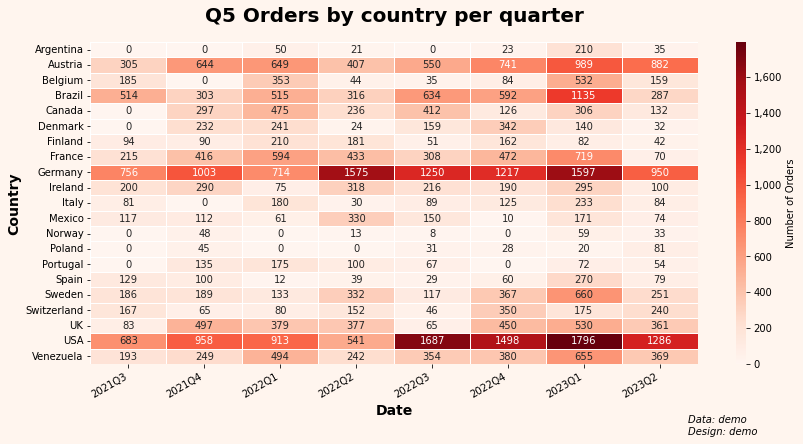

In [36]:
# Visualization with Matplotlib and Seaborn
plot_heatmap(df5.T, title='Q5 Orders by country per quarter',
             xlabel='Date', ylabel='Country',
             cbar_label='Number of Orders',
             figsize=(12, 6))

##### [**3.1.6 Question: Value of orders over time**](#Part1:-Overall-business-health-with-pandas)

In [37]:
# 3.1.6 Question: Value of orders over time
df6 = (pd.pivot_table(df[['Value', 'Category Name', 'Quarter']], 
                      values='Value', index=['Quarter'], 
                      columns=['Category Name'], aggfunc="sum"))
df6

Category Name,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
Quarter,,,,,,,,
2021Q3,17007.50,7987.35,22446.65,20744.9,2971.75,13842.05,7681.45,12949.29
2021Q4,50341.50,16369.25,17001.35,35036.1,9317.75,24050.22,11249.80,14047.94
2022Q1,47927.50,17797.30,25445.74,31668.0,16204.50,24384.12,11599.95,9927.01
2022Q2,26633.50,13694.40,22374.55,27943.2,16398.00,15400.59,15849.30,14405.70
2022Q3,20696.25,15049.40,22185.83,32999.6,16065.00,22252.48,8992.25,26938.83
2022Q4,24752.25,16887.85,22514.69,37932.6,15468.75,30477.66,23606.40,22077.92
2023Q1,93156.75,22745.95,46716.75,45715.8,20212.00,33546.69,16009.80,37138.38
2023Q2,29067.00,11811.50,11642.98,37088.1,10210.25,26728.88,16406.05,11574.46


In [38]:
# Table Visualization
df6.style.pipe(custom_table)

Category Name,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
Quarter,,,,,,,,
2021Q3,17007.50,7987.35,22446.65,20744.90,2971.75,13842.05,7681.45,12949.29
2021Q4,50341.50,16369.25,17001.35,35036.10,9317.75,24050.22,11249.80,14047.94
2022Q1,47927.50,17797.30,25445.74,31668.00,16204.50,24384.12,11599.95,9927.01
2022Q2,26633.50,13694.40,22374.55,27943.20,16398.00,15400.59,15849.30,14405.70
2022Q3,20696.25,15049.40,22185.83,32999.60,16065.00,22252.48,8992.25,26938.83
2022Q4,24752.25,16887.85,22514.69,37932.60,15468.75,30477.66,23606.40,22077.92
2023Q1,93156.75,22745.95,46716.75,45715.80,20212.00,33546.69,16009.80,37138.38
2023Q2,29067.00,11811.50,11642.98,37088.10,10210.25,26728.88,16406.05,11574.46


In [39]:
# Table Visualization with option from Seaborn
import seaborn as sns
cm = sns.light_palette("orangered", as_cmap=True)
df6.style.background_gradient(cmap=cm).format(precision=2)

Category Name,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
Quarter,,,,,,,,
2021Q3,17007.50,7987.35,22446.65,20744.90,2971.75,13842.05,7681.45,12949.29
2021Q4,50341.50,16369.25,17001.35,35036.10,9317.75,24050.22,11249.80,14047.94
2022Q1,47927.50,17797.30,25445.74,31668.00,16204.50,24384.12,11599.95,9927.01
2022Q2,26633.50,13694.40,22374.55,27943.20,16398.00,15400.59,15849.30,14405.70
2022Q3,20696.25,15049.40,22185.83,32999.60,16065.00,22252.48,8992.25,26938.83
2022Q4,24752.25,16887.85,22514.69,37932.60,15468.75,30477.66,23606.40,22077.92
2023Q1,93156.75,22745.95,46716.75,45715.80,20212.00,33546.69,16009.80,37138.38
2023Q2,29067.00,11811.50,11642.98,37088.10,10210.25,26728.88,16406.05,11574.46


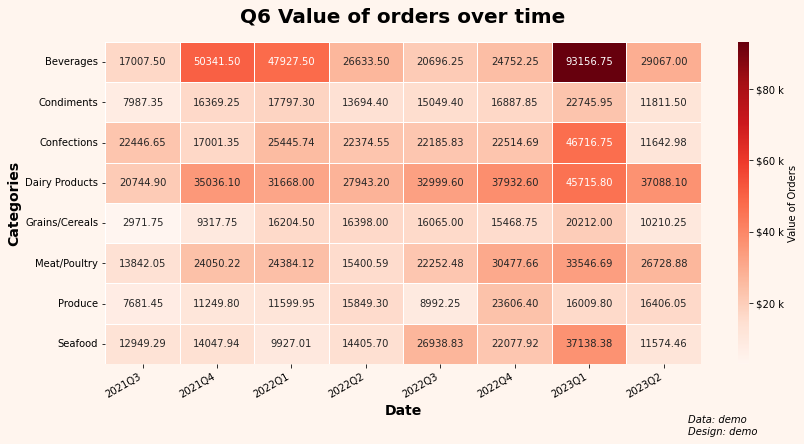

In [40]:
# Visualization with Matplotlib and Seaborn
plot_heatmap(df6.T, title='Q6 Value of orders over time',
             xlabel='Date', ylabel='Categories',
             cbar_label='Value of Orders',
             figsize=(12, 6))

#### [**Part2: Top performing products with pandas**](#3.1-Get-answers-with-pandas)

##### [**3.1.7 Question: Best selling products**](#Part2:-Top-performing-products-with-pandas)

In [41]:
# 3.1.7 Question: Best selling products
df7 = (df[['Quantity','Product Name', 'Month']]
       .groupby(['Month','Product Name'], as_index=False)
       .agg(Orders=('Quantity','sum')))

df7['ratio'] = (df7.groupby(['Month'], as_index=False)['Orders']
                .transform(lambda x:  round(x / x.sum(), 3)))

(df7.sort_values(by=['Product Name','Month'], 
                 ascending=[True, True], inplace=True))

df7['ratio_diff'] = (df7.groupby(['Product Name'], as_index=False)['ratio']
                     .transform(lambda x: pd.Series.diff(x)))

# Explicitly sort df
df7 = (df7.set_index([df7['Month'], df7.index])
       .loc[df7.groupby(['Month'], as_index=True)['Orders']
       .nlargest(1, keep='all').index]
       .reset_index(level=0, drop=True)
       .sort_values(by=['Month','Orders'], ascending=[True, False]))

# Map 'Category Name'
prd_cat = (pd.merge(products[['Product Name' ,'Category ID']],
                    categories[['Category ID' ,'Category Name']],
                    left_on='Category ID',
                    right_on='Category ID')
           [['Product Name', 'Category Name']].values)
prd_cat_map = {i:j for i,j in prd_cat}
df7['Category Name'] = df7['Product Name'].map(prd_cat_map)
df7

,Month,Product Name,Orders,ratio,ratio_diff,Category Name
3,2021-07,Chang,105,0.072,NaN,Beverages
77,2021-08,Steeleye Stout,104,0.079,0.065,Beverages
115,2021-09,Tarte au sucre,125,0.111,0.072,Confections
119,2021-10,Alice Mutton,98,0.056,0.020,Meat/Poultry
168,2021-11,Camembert Pierrot,143,0.082,0.025,Dairy Products
...,...,...,...,...,...,...
871,2023-01,Camembert Pierrot,156,0.045,0.039,Dairy Products
986,2023-02,Thoringer Rostbratwurst,164,0.053,0.048,Meat/Poultry
1019,2023-03,Konbu,288,0.071,0.048,Seafood
1101,2023-04,Raclette Courdavault,322,0.069,0.068,Dairy Products


In [42]:
# Table Visualization
df7.style.pipe(custom_table)

,Month,Product Name,Orders,ratio,ratio_diff,Category Name
3,2021-07,Chang,105,0.07,nan,Beverages
77,2021-08,Steeleye Stout,104,0.08,0.07,Beverages
115,2021-09,Tarte au sucre,125,0.11,0.07,Confections
119,2021-10,Alice Mutton,98,0.06,0.02,Meat/Poultry
168,2021-11,Camembert Pierrot,143,0.08,0.03,Dairy Products
217,2021-12,Gorgonzola Telino,164,0.07,0.01,Dairy Products
263,2022-01,Geitost,119,0.05,0.02,Dairy Products
331,2022-02,Pate chinois,180,0.08,0.08,Meat/Poultry
385,2022-03,Raclette Courdavault,162,0.09,0.07,Dairy Products
416,2022-04,Gnocchi di nonna Alice,154,0.08,0.05,Grains/Cereals


##### [**3.1.8 Question: Top three all-time products**](#Part2:-Top-performing-products-with-pandas)

In [43]:
# 3.1.8 Question: Top three all-time products
df8 = (df[['Quantity','Product Name']]
       .groupby(['Product Name'], as_index=False)
       .agg(Orders=('Quantity','sum')))

df8['Percentage %'] = (round(df8['Orders'] / df8['Orders'].sum() * 100, 2))

# Map 'Category Name'
prd_cat = (pd.merge(products[['Product Name' ,'Category ID']],
                    categories[['Category ID' ,'Category Name']],
                    left_on='Category ID', right_on='Category ID')
           [['Product Name', 'Category Name']].values)
prd_cat_map = {i:j for i,j in prd_cat}
df8['Category Name'] = df8['Product Name'].map(prd_cat_map)

df8.nlargest(3, 'Orders', keep='all')

,Product Name,Orders,Percentage %,Category Name
3,Camembert Pierrot,1577,3.07,Dairy Products
51,Raclette Courdavault,1496,2.92,Dairy Products
18,Gorgonzola Telino,1397,2.72,Dairy Products


In [44]:
df8x = (df8.nlargest(3, 'Orders', keep='all')
        [['Product Name','Orders']]
        .reset_index(drop=True))
df8x['Rank'] = ['1st', '2nd', '3rd']
df8x

,Product Name,Orders,Rank
0,Camembert Pierrot,1577,1st
1,Raclette Courdavault,1496,2nd
2,Gorgonzola Telino,1397,3rd


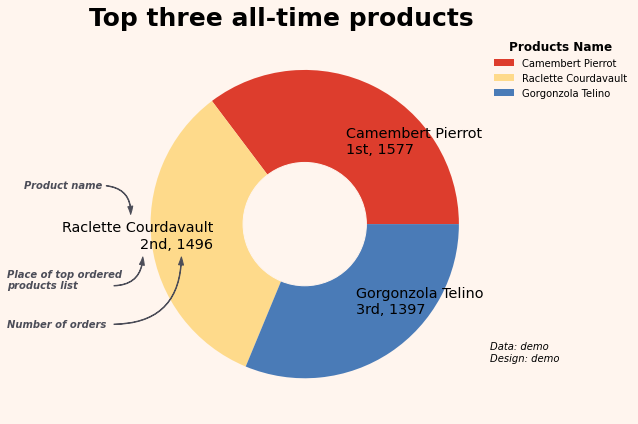

In [45]:
# Visualization with Matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

plt.close()
fig, ax = plt.subplots(figsize=(8, 6), layout='tight')
# Set background color
ax.set_facecolor('seashell')
fig.set_facecolor('seashell')

data = df8x['Orders'].values
items = df8x['Product Name'].values
labels=[f'{i[0]}\n{i[2]}, {i[1]}' for i in df8x.iloc[:,[0,1,2]].values.tolist()]
clrs = ['#DD3D2D', '#FEDA8B','#4A7BB7']

# Create a circle at the center of the plot
my_circle = plt.Circle((0,0), 0.4, color='seashell')

# Crete pie chart
wedges, _ = ax.pie(data, labels=labels, labeldistance=.6, colors=clrs,
                   textprops=dict(color="black", size='x-large'))

ax.set_xlim(-1.3, 1.0)
p = plt.gcf()
p.gca().add_artist(my_circle)

# Add title and legend.
ax.set_title('Top three all-time products', weight='bold', size=25)
ax.legend(wedges, items, title="Products Name",
          loc="best", frameon=False, facecolor='seashell',
          title_fontproperties=dict(size='large',weight='bold'),
          bbox_to_anchor=(1, 0, 0.5, 1))
# Add footnote at the bottom of the chart
footnote=['Data: demo','Design: demo']
ax.text(1.2, -0.9, '\n'.join(footnote),
        color='#000000', fontsize=10,
        style='italic',
        va='bottom', ha='left')

# Add notes and arrows.
# This define the style of the arrow. 
style = "Simple, tail_width=0.5, head_width=5, head_length=8"
arrow = FancyArrowPatch((-1.3, 0.25), (-1.13, 0.05),
                        color = '#4C4D58', arrowstyle = style,
                        connectionstyle="arc3, rad=-0.5")
ax.add_patch(arrow)
arrow = FancyArrowPatch((-1.25, -.4), (-1.05, -0.2),
                        color = '#4C4D58', arrowstyle = style,
                        connectionstyle="arc3, rad=0.5")
ax.add_patch(arrow)
arrow = FancyArrowPatch((-1.25, -.65), (-.8, -0.2),
                        color = '#4C4D58', arrowstyle = style,
                        connectionstyle="arc3, rad=0.5")
ax.add_patch(arrow)

ax.text(-1.82, +0.22, 'Product name',
        color='#4C4D58', fontsize=10,
        style='italic',weight='bold',
        va='bottom', ha='left')
ax.text(-1.93, -0.43, f'Place of top ordered\nproducts list',
        color='#4C4D58', fontsize=10,
        style='italic',weight='bold',
        va='bottom', ha='left')
ax.text(-1.93, -0.68,
        'Number of orders',
        color='#4C4D58', fontsize=10,
        weight='bold',style='italic',
        va='bottom', ha='left')

plt.show()

#### [**Part3: Product category insights with pandas**](#3.1-Get-answers-with-pandas)

##### [**3.1.9 Question: Number of orders by category per quarter**](#Part3:-Product-category-insights-with-pandas)

In [46]:
# 3.1.9 Question: Number of orders by category per quarter
df9 = (pd.pivot_table(df[['Quantity', 'Category Name', 'Quarter']], 
                      values='Quantity', 
                      index=['Quarter'], 
                      columns=['Category Name'], 
                      aggfunc="sum"))
df9

Category Name,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
Quarter,,,,,,,,
2021Q3,904,403,663,694,126,287,210,621
2021Q4,938,559,694,1392,423,663,339,665
2022Q1,1021,814,1313,1007,622,701,349,476
2022Q2,903,654,792,1130,681,359,406,786
2022Q3,835,728,916,1065,709,460,247,1298
2022Q4,1237,699,1116,1172,624,669,581,1119
2023Q1,2381,936,1795,1649,944,527,446,1968
2023Q2,1313,505,617,1040,433,533,412,748


In [47]:
# Table Visualization
df9.style.pipe(custom_table)

Category Name,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
Quarter,,,,,,,,
2021Q3,904,403,663,694,126,287,210,621
2021Q4,938,559,694,1392,423,663,339,665
2022Q1,1021,814,1313,1007,622,701,349,476
2022Q2,903,654,792,1130,681,359,406,786
2022Q3,835,728,916,1065,709,460,247,1298
2022Q4,1237,699,1116,1172,624,669,581,1119
2023Q1,2381,936,1795,1649,944,527,446,1968
2023Q2,1313,505,617,1040,433,533,412,748


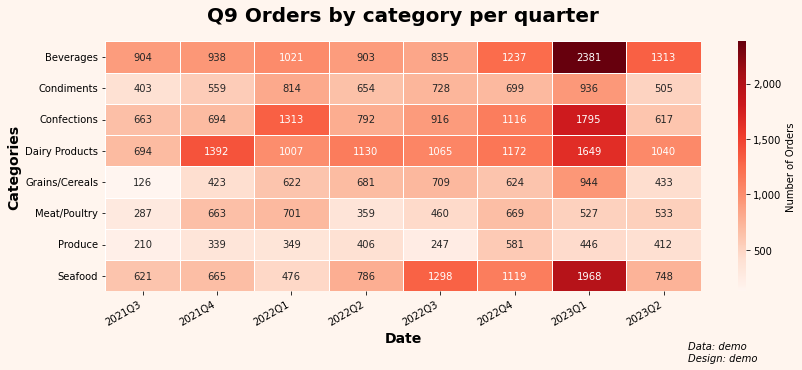

In [48]:
# Visualization with Matplotlib and Seaborn
plot_heatmap(df9.T, title='Q9 Orders by category per quarter',
             xlabel='Date', ylabel='Categories',
             cbar_label='Number of Orders',
             figsize=(12, 5))

##### [**3.1.10 Question: Total orders by category**](#Part3:-Product-category-insights-with-pandas)

In [49]:
# 3.1.10 Question: Total orders by category
df10 = (df[['Quantity','Category Name']]
        .groupby(['Category Name'], as_index=False)
        .agg(Orders=('Quantity', 'sum'))
        .sort_values(by=['Orders'], ascending=False))

df10['Percentage %'] = round(df10['Orders'] / df10['Orders'].sum() * 100, 2)
df10.reset_index(drop=True, inplace=True)
df10

,Category Name,Orders,Percentage %
0,Beverages,9532,18.57
1,Dairy Products,9149,17.83
2,Confections,7906,15.41
3,Seafood,7681,14.97
4,Condiments,5298,10.32
5,Grains/Cereals,4562,8.89
6,Meat/Poultry,4199,8.18
7,Produce,2990,5.83


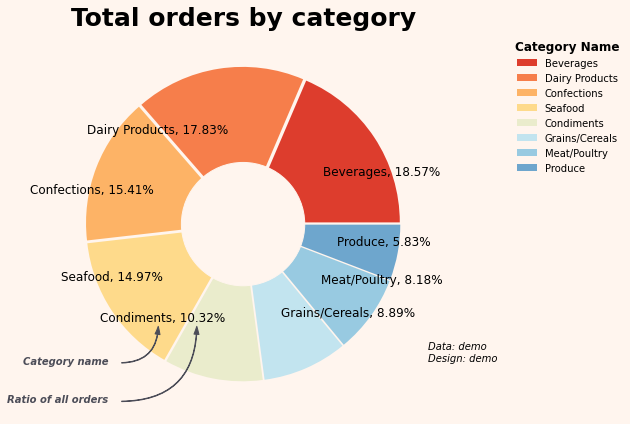

In [50]:
# Visualization with Matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

plt.close()
fig, ax = plt.subplots(figsize=(8, 6), layout='tight')
# Set the background color
ax.set_facecolor('seashell')
fig.set_facecolor('seashell')

data = df10['Orders'].values
items = df10['Category Name'].values
labels = [f'{i[0]}, {i[1]}%' for i in df10.iloc[:,[0,2]].values.tolist()]
colors = ['#DD3D2D','#F67E4B','#FDB366','#FEDA8B',
          '#EAECCC','#C2E4EF','#98CAE1','#6EA6CD']

# Create a circle at the center of the plot
center_circle = plt.Circle((0,0), 0.4, color='seashell')

# Crete pie chart
wedges, _ = ax.pie(data, labels=labels, labeldistance=.6, colors=colors,
                   explode=np.ones(8) * 0.02,
                   textprops=dict(size='large'))
p = plt.gcf()
p.gca().add_artist(center_circle)

# Add legend footnote and title.
ax.legend(wedges, items, title='Category Name',
          loc='best', frameon=False, facecolor='seashell',
          title_fontproperties=dict(size='large',weight='bold',),
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Total orders by category', weight='bold', size=25)
# Add notes and arrows.
# This define the style of the arrow. 
style = "Simple, tail_width=0.5, head_width=5, head_length=8"

arrow = FancyArrowPatch((-0.8, -0.9), (-0.55, -0.65),
                        color = '#4C4D58', arrowstyle = style,
                        connectionstyle="arc3, rad=0.5")
ax.add_patch(arrow)
arrow = FancyArrowPatch((-0.8, -1.15), (-.3, -0.65),
                        color = '#4C4D58', arrowstyle = style,
                        connectionstyle="arc3, rad=0.5")
ax.add_patch(arrow)

ax.text(-1.43, -0.92, 'Category name',
        color='#4C4D58', fontsize=10,
        style='italic',weight='bold',
        va='bottom', ha='left')
ax.text(-1.53, -1.17,
        'Ratio of all orders',
        color='#4C4D58', fontsize=10,
        weight='bold',style='italic',
        va='bottom', ha='left')

# Add footnote at the bottom of the chart
footnote=['Data: demo','Design: demo']
ax.text(1.2, -0.9, '\n'.join(footnote),
        color='#000000', fontsize=10,
        style='italic',
        va='bottom', ha='left')

plt.show()

### [**3.2 Get answers with SQL**](#Table-of-contents)

#### [**Create connection and cursor**](#5-Business-Question-with-SQL)

In [51]:
# Prepare connection and cursor
import psycopg2
from psycopg2 import sql
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
import os
import json

# Get database configuration
path_to_config = os.path.join(os.getcwd(), 'configs/', 'db_config.json')
with open(path_to_config, 'r') as config_file:
    db_config = json.load(config_file)

try:
    # Establish connection to database
    logger.debug(f'Establish connection to database.')
    con = psycopg2.connect(**db_config)
    con.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
    
    # Create a cursor object to interact with database
    logger.debug(f'Create a cursor')
    cur = con.cursor()
    logger.debug(f'cursor ready')

except (Exception, psycopg2.Error) as error:
    logger.exception(f'database operation failed: {error}')

finally:
    if con:
        # cur.close()
        # con.close()
        logger.debug(f'database ready')

2024-12-02 07:37:28,495:__main__:Establish connection to database.
2024-12-02 07:37:28,526:__main__:Create a cursor
2024-12-02 07:37:28,527:__main__:cursor ready
2024-12-02 07:37:28,528:__main__:database ready


##### [**Review available tables and columns**](#5-Business-Question-with-SQL)

In [52]:
# List available tables of database retailerdb
cur.execute("SELECT table_name FROM information_schema.tables WHERE table_schema='public' AND table_type='BASE TABLE';")
for i in cur.fetchall():
    print(i[0])

categories
products
customers
orders
orders_details


In [53]:
# List columns of table categories
cur.execute("SELECT column_name FROM information_schema.columns where table_name = 'categories' order by ordinal_position;")
for i in cur.fetchall():
    print(i[0])

category_id
category_name
description


In [54]:
# List columns of table customers
cur.execute("SELECT column_name FROM information_schema.columns where table_name = 'customers' order by ordinal_position;")
for i in cur.fetchall():
    print(i[0])

customer_id
customer_name
contact_name
address
city
postal_code
country


In [55]:
# List columns of table orders
cur.execute("SELECT column_name FROM information_schema.columns where table_name = 'orders' order by ordinal_position;")
for i in cur.fetchall():
    print(i[0])

order_id
customer_id
order_date


In [56]:
# List columns of table orders_details
cur.execute("SELECT column_name FROM information_schema.columns where table_name = 'orders_details' order by ordinal_position;")
for i in cur.fetchall():
    print(i[0])

order_detail_id
order_id
product_id
quantity


In [57]:
# List columns of table products
cur.execute("SELECT column_name FROM information_schema.columns where table_name = 'products' order by ordinal_position;")
for i in cur.fetchall():
    print(i[0])

product_id
product_name
category_id
unit
price


#### [**Part1: Overall business health with SQL**](#3.2-Get-answers-with-SQL)

##### [**3.2.1 Question: Revenue per quarter**](#Part1:-Overall-business-health-with-SQL)

In [58]:
# 3.2.1 Question: Revenue per quarter
cur.execute("""\
SELECT to_char(order_date, 'YYYY"Q"Q') AS quarter, SUM(price * quantity) AS revenue \
FROM orders AS o \
INNER JOIN orders_details AS od ON o.order_id = od.order_id \
INNER JOIN products AS p ON od.product_id = p.product_id \
INNER JOIN categories AS c ON p.category_id = c.category_id \
GROUP BY quarter \
ORDER BY quarter;\
""")

# Fetch all rows
data = cur.fetchall()
data

[('2021Q3', Decimal('105630.94')),
 ('2021Q4', Decimal('177413.91')),
 ('2022Q1', Decimal('184954.12')),
 ('2022Q2', Decimal('152699.24')),
 ('2022Q3', Decimal('165179.64')),
 ('2022Q4', Decimal('193718.12')),
 ('2023Q1', Decimal('315242.12')),
 ('2023Q2', Decimal('154529.22'))]

##### [**3.2.2 Question: Number of orders per month**](#Part1:-Overall-business-health-with-SQL)

In [59]:
# 3.2.2 Question: Number of orders per month
cur.execute("""\
SELECT to_char(order_date, 'YYYY"-"mm') AS month, SUM(quantity) AS num_of_orders \
FROM orders \
INNER JOIN orders_details ON orders.order_id = orders_details.order_id \
GROUP BY month \
ORDER BY month;\
""")

# Fetch all rows
data = cur.fetchall()
data

[('2021-07', 1462),
 ('2021-08', 1322),
 ('2021-09', 1124),
 ('2021-10', 1738),
 ('2021-11', 1735),
 ('2021-12', 2200),
 ('2022-01', 2401),
 ('2022-02', 2132),
 ('2022-03', 1770),
 ('2022-04', 1912),
 ('2022-05', 2164),
 ('2022-06', 1635),
 ('2022-07', 2054),
 ('2022-08', 1861),
 ('2022-09', 2343),
 ('2022-10', 2679),
 ('2022-11', 1856),
 ('2022-12', 2682),
 ('2023-01', 3466),
 ('2023-02', 3115),
 ('2023-03', 4065),
 ('2023-04', 4680),
 ('2023-05', 921)]

##### [**3.2.3 Question: Unique customers per month**](#Part1:-Overall-business-health-with-SQL)

In [60]:
# 3.2.3 Question: Unique customers per month
#  solution 1: straightforward but performance is not pretty good.
#              SELECT COUNT(DISTINCT country) FROM customers;
#  solution 2: A little complex, but get better performance. subquery
#              SELECT COUNT(*) FROM (SELECT DISTINCT column_name FROM table_name) AS temp;

#  solution 2:
cur.execute("""\
WITH count_distinct AS (SELECT to_char(order_date, 'YYYY"-"mm') AS month FROM orders GROUP BY month, customer_id)
SELECT month,count(month) AS nunique FROM count_distinct GROUP BY month ORDER BY month; 
""")

# Fetch all rows
data = cur.fetchall()
data

[('2021-07', 20),
 ('2021-08', 18),
 ('2021-09', 19),
 ('2021-10', 20),
 ('2021-11', 21),
 ('2021-12', 25),
 ('2022-01', 27),
 ('2022-02', 21),
 ('2022-03', 24),
 ('2022-04', 27),
 ('2022-05', 26),
 ('2022-06', 25),
 ('2022-07', 25),
 ('2022-08', 30),
 ('2022-09', 27),
 ('2022-10', 28),
 ('2022-11', 27),
 ('2022-12', 37),
 ('2023-01', 42),
 ('2023-02', 35),
 ('2023-03', 49),
 ('2023-04', 51),
 ('2023-05', 13)]

##### [**3.2.4 Question: Revenue and orders over time**](#Part1:-Overall-business-health-with-SQL)

In [61]:
# 3.2.4 Question: Revenue and orders over time
cur.execute("""\
SELECT to_char(order_date, 'YYYY"-"mm') AS month, SUM(price * quantity) AS revenue, SUM(quantity) AS num_of_orders \
FROM orders AS o \
INNER JOIN orders_details AS od ON o.order_id = od.order_id \
INNER JOIN products AS p ON od.product_id = p.product_id \
INNER JOIN categories AS c ON p.category_id = c.category_id \
GROUP BY month \
ORDER BY month;\
""")

# Fetch all rows
data = cur.fetchall()
data

[('2021-07', Decimal('37779.85'), 1462),
 ('2021-08', Decimal('33285.49'), 1322),
 ('2021-09', Decimal('34565.60'), 1124),
 ('2021-10', Decimal('51528.69'), 1738),
 ('2021-11', Decimal('62163.99'), 1735),
 ('2021-12', Decimal('63721.23'), 2200),
 ('2022-01', Decimal('83400.47'), 2401),
 ('2022-02', Decimal('51561.06'), 2132),
 ('2022-03', Decimal('49992.59'), 1770),
 ('2022-04', Decimal('56787.54'), 1912),
 ('2022-05', Decimal('56823.70'), 2164),
 ('2022-06', Decimal('39088.00'), 1635),
 ('2022-07', Decimal('55464.93'), 2054),
 ('2022-08', Decimal('49981.69'), 1861),
 ('2022-09', Decimal('59733.02'), 2343),
 ('2022-10', Decimal('70328.50'), 2679),
 ('2022-11', Decimal('45913.36'), 1856),
 ('2022-12', Decimal('77476.26'), 2682),
 ('2023-01', Decimal('100854.72'), 3466),
 ('2023-02', Decimal('104561.95'), 3115),
 ('2023-03', Decimal('109825.45'), 4065),
 ('2023-04', Decimal('134630.56'), 4680),
 ('2023-05', Decimal('19898.66'), 921)]

##### [**3.2.5 Question: Number of orders by country per quarter**](#Part1:-Overall-business-health-with-SQL)

In [62]:
# 3.2.5 Question: Number of orders by country per quarter
cur.execute("""\
SELECT to_char(order_date, 'YYYY"Q"Q') AS quarter, country, SUM(quantity) AS num_of_orders \
FROM orders AS o \
INNER JOIN orders_details AS od ON o.order_id = od.order_id \
INNER JOIN products AS p ON od.product_id = p.product_id \
INNER JOIN customers AS c ON o.customer_id = c.customer_id \
GROUP BY quarter, country \
ORDER BY quarter, country;\
""")

# Fetch all rows
data = cur.fetchall()
data

[('2021Q3', 'Austria', 305),
 ('2021Q3', 'Belgium', 185),
 ('2021Q3', 'Brazil', 514),
 ('2021Q3', 'Finland', 94),
 ('2021Q3', 'France', 215),
 ('2021Q3', 'Germany', 756),
 ('2021Q3', 'Ireland', 200),
 ('2021Q3', 'Italy', 81),
 ('2021Q3', 'Mexico', 117),
 ('2021Q3', 'Spain', 129),
 ('2021Q3', 'Sweden', 186),
 ('2021Q3', 'Switzerland', 167),
 ('2021Q3', 'UK', 83),
 ('2021Q3', 'USA', 683),
 ('2021Q3', 'Venezuela', 193),
 ('2021Q4', 'Austria', 644),
 ('2021Q4', 'Brazil', 303),
 ('2021Q4', 'Canada', 297),
 ('2021Q4', 'Denmark', 232),
 ('2021Q4', 'Finland', 90),
 ('2021Q4', 'France', 416),
 ('2021Q4', 'Germany', 1003),
 ('2021Q4', 'Ireland', 290),
 ('2021Q4', 'Mexico', 112),
 ('2021Q4', 'Norway', 48),
 ('2021Q4', 'Poland', 45),
 ('2021Q4', 'Portugal', 135),
 ('2021Q4', 'Spain', 100),
 ('2021Q4', 'Sweden', 189),
 ('2021Q4', 'Switzerland', 65),
 ('2021Q4', 'UK', 497),
 ('2021Q4', 'USA', 958),
 ('2021Q4', 'Venezuela', 249),
 ('2022Q1', 'Argentina', 50),
 ('2022Q1', 'Austria', 649),
 ('2022Q1', 

In [63]:
# 3.2.5 Question: Number of orders by country per quarter
import psycopg2
from psycopg2 import sql
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
import os
import json

# Get database configuration
path_to_config = os.path.join(os.getcwd(), 'configs/', 'db_config.json')
with open(path_to_config, 'r') as config_file:
    db_config = json.load(config_file)

try:
    print("Create database connection.")
    connection = psycopg2.connect(**db_config)
    connection.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
    cursor = connection.cursor()
    
    print("Create temp view.")
    cursor.execute("CREATE EXTENSION IF NOT EXISTS tablefunc;")
    cursor.execute("DROP VIEW IF EXISTS myview5;")
    cursor.execute("""\
    CREATE TEMP VIEW myview5 AS \
    SELECT to_char(order_date, 'YYYY"Q"Q') as quarter, \
    country , SUM(quantity) AS num_of_orders \
    FROM orders AS o \
    INNER JOIN orders_details AS od ON o.order_id = od.order_id \
    INNER JOIN products AS p ON od.product_id = p.product_id \
    INNER JOIN customers AS c ON o.customer_id = c.customer_id \
    GROUP BY quarter, country \
    ORDER BY quarter ASC, num_of_orders DESC;\
    """)
    print("Temp view ready.")

    print("Create cross table.")
    # With fill None as 0
    cursor.execute('''SELECT quarter\
     , COALESCE(Argentina, 0)\
     , COALESCE(Austria, 0)\
     , COALESCE(Belgium, 0)\
     , COALESCE(Brazil, 0)\
     , COALESCE(Canada, 0)\
     , COALESCE(Denmark, 0)\
     , COALESCE(Finland, 0)\
     , COALESCE(France, 0)\
     , COALESCE(Germany, 0)\
     , COALESCE(Ireland, 0)\
     , COALESCE(Italy, 0)\
     , COALESCE(Mexico, 0)\
     , COALESCE(Norway, 0)\
     , COALESCE(Poland, 0)\
     , COALESCE(Portugal, 0)\
     , COALESCE(Spain, 0)\
     , COALESCE(Sweden, 0)\
     , COALESCE(Switzerland, 0)\
     , COALESCE(UK, 0)\
     , COALESCE(USA, 0)\
     , COALESCE(venezuela, 0) \
    FROM crosstab('SELECT quarter, country, num_of_orders \
    FROM myview5', \
    $$VALUES ('Argentina'::text), ('Austria'), ('Belgium'), ('Brazil'), ('Canada'), \
    ('Denmark'), ('Finland'), ('France'), ('Germany'), ('Ireland'), ('Italy'), \
    ('Mexico'), ('Norway'), ('Poland'), ('Portugal'), ('Spain'), ('Sweden'), \
    ('Switzerland'), ('UK'), ('USA'), ('Venezuela')$$ \
    ) \
    AS ct (quarter text, Argentina numeric, Austria numeric, Belgium numeric, \
    Brazil numeric, Canada numeric, Denmark numeric, Finland numeric, France numeric, \
    Germany numeric, Ireland numeric, Italy numeric, Mexico numeric, Norway numeric, \
    Poland numeric, Portugal numeric, Spain numeric, Sweden numeric, \
    Switzerland numeric, UK numeric, USA numeric, Venezuela numeric );\
    ''')

    print("cross table ready.")
    for i in cursor.fetchall():
        print(i)

except (Exception, psycopg2.Error) as error:
    print(f"database operation failed: {error}")

finally:
    if connection:
        cursor.close()
        connection.close()
        print("Database connection closed.")

Create database connection.
Create temp view.
Temp view ready.
Create cross table.
cross table ready.
('2021Q3', Decimal('0'), Decimal('305'), Decimal('185'), Decimal('514'), Decimal('0'), Decimal('0'), Decimal('94'), Decimal('215'), Decimal('756'), Decimal('200'), Decimal('81'), Decimal('117'), Decimal('0'), Decimal('0'), Decimal('0'), Decimal('129'), Decimal('186'), Decimal('167'), Decimal('83'), Decimal('683'), Decimal('193'))
('2021Q4', Decimal('0'), Decimal('644'), Decimal('0'), Decimal('303'), Decimal('297'), Decimal('232'), Decimal('90'), Decimal('416'), Decimal('1003'), Decimal('290'), Decimal('0'), Decimal('112'), Decimal('48'), Decimal('45'), Decimal('135'), Decimal('100'), Decimal('189'), Decimal('65'), Decimal('497'), Decimal('958'), Decimal('249'))
('2022Q1', Decimal('50'), Decimal('649'), Decimal('353'), Decimal('515'), Decimal('475'), Decimal('241'), Decimal('210'), Decimal('594'), Decimal('714'), Decimal('75'), Decimal('180'), Decimal('61'), Decimal('0'), Decimal('0'), 

##### [**3.2.6 Question: Value of orders over time**](#Part1:-Overall-business-health-with-SQL)

In [64]:
# 3.2.6 Question: Value of orders over time
cur.execute("""\
SELECT to_char(order_date, 'YYYY"-"mm') AS month, SUM(price * quantity) AS value \
FROM orders AS o \
INNER JOIN orders_details AS od ON o.order_id = od.order_id \
INNER JOIN products AS p ON od.product_id = p.product_id \
INNER JOIN categories AS c ON p.category_id = c.category_id \
GROUP BY month \
ORDER BY month;\
""")

# Fetch all rows
data = cur.fetchall()
data

[('2021-07', Decimal('37779.85')),
 ('2021-08', Decimal('33285.49')),
 ('2021-09', Decimal('34565.60')),
 ('2021-10', Decimal('51528.69')),
 ('2021-11', Decimal('62163.99')),
 ('2021-12', Decimal('63721.23')),
 ('2022-01', Decimal('83400.47')),
 ('2022-02', Decimal('51561.06')),
 ('2022-03', Decimal('49992.59')),
 ('2022-04', Decimal('56787.54')),
 ('2022-05', Decimal('56823.70')),
 ('2022-06', Decimal('39088.00')),
 ('2022-07', Decimal('55464.93')),
 ('2022-08', Decimal('49981.69')),
 ('2022-09', Decimal('59733.02')),
 ('2022-10', Decimal('70328.50')),
 ('2022-11', Decimal('45913.36')),
 ('2022-12', Decimal('77476.26')),
 ('2023-01', Decimal('100854.72')),
 ('2023-02', Decimal('104561.95')),
 ('2023-03', Decimal('109825.45')),
 ('2023-04', Decimal('134630.56')),
 ('2023-05', Decimal('19898.66'))]

#### [**Part2: Top performing products with SQL**](#3.2-Get-answers-with-SQL)

##### [**3.2.7 Question: Best selling products**](#Part2:-Top-performing-products-with-SQL)

In [65]:
# 3.2.7 Question: Best selling products
# TOP 1 product of each month
cur.execute("""\
SELECT month, product_name, best_sale \
    FROM (\
        SELECT to_char(order_date, 'YYYY"-"mm') AS month, ROW_NUMBER() OVER (PARTITION BY to_char(order_date, 'YYYY"-"mm') order by product_name DESC) AS r, product_name, SUM(quantity) AS best_sale \
        FROM orders_details AS od \
        INNER JOIN orders AS o ON o.order_id = od.order_id \
        INNER JOIN products AS p ON od.product_id = p.product_id \
        GROUP BY month, product_name \
        ORDER BY month ASC, best_sale DESC) AS x \
WHERE x.r <= 1;\
""")

# Fetch all rows
data = cur.fetchall()
data

[('2021-07', 'Uncle Bobs Organic Dried Pears', 15),
 ('2021-08', 'Wimmers gute Semmelknadel', 9),
 ('2021-09', 'Tourtiare', 5),
 ('2021-10', 'Zaanse koeken', 16),
 ('2021-11', 'Wimmers gute Semmelknadel', 35),
 ('2021-12', 'Wimmers gute Semmelknadel', 30),
 ('2022-01', 'Zaanse koeken', 85),
 ('2022-02', 'Wimmers gute Semmelknadel', 71),
 ('2022-03', 'Zaanse koeken', 30),
 ('2022-04', 'Zaanse koeken', 6),
 ('2022-05', 'Uncle Bobs Organic Dried Pears', 10),
 ('2022-06', 'Zaanse koeken', 25),
 ('2022-07', 'Zaanse koeken', 15),
 ('2022-08', 'Wimmers gute Semmelknadel', 9),
 ('2022-09', 'Zaanse koeken', 71),
 ('2022-10', 'Zaanse koeken', 67),
 ('2022-11', 'Zaanse koeken', 30),
 ('2022-12', 'Zaanse koeken', 30),
 ('2023-01', 'Zaanse koeken', 40),
 ('2023-02', 'Zaanse koeken', 21),
 ('2023-03', 'Zaanse koeken', 49),
 ('2023-04', 'Wimmers gute Semmelknadel', 45),
 ('2023-05', 'Wimmers gute Semmelknadel', 132)]

In [66]:
# 3.2.7 Question: Best selling products
# TOP 1 product of each month with rank
cur.execute("""\
SELECT * \
    FROM (\
        SELECT to_char(order_date, 'YYYY"-"mm') AS month, ROW_NUMBER() OVER (PARTITION BY to_char(order_date, 'YYYY"-"mm') order by product_name DESC) AS r, product_name, SUM(quantity) AS best_sale \
        FROM orders_details AS od \
        INNER JOIN orders AS o ON o.order_id = od.order_id \
        INNER JOIN products AS p ON od.product_id = p.product_id \
        GROUP BY month, product_name \
        ORDER BY month ASC, best_sale DESC) AS x \
WHERE x.r <= 1;\
""")

# Fetch all rows
data = cur.fetchall()
data

[('2021-07', 1, 'Uncle Bobs Organic Dried Pears', 15),
 ('2021-08', 1, 'Wimmers gute Semmelknadel', 9),
 ('2021-09', 1, 'Tourtiare', 5),
 ('2021-10', 1, 'Zaanse koeken', 16),
 ('2021-11', 1, 'Wimmers gute Semmelknadel', 35),
 ('2021-12', 1, 'Wimmers gute Semmelknadel', 30),
 ('2022-01', 1, 'Zaanse koeken', 85),
 ('2022-02', 1, 'Wimmers gute Semmelknadel', 71),
 ('2022-03', 1, 'Zaanse koeken', 30),
 ('2022-04', 1, 'Zaanse koeken', 6),
 ('2022-05', 1, 'Uncle Bobs Organic Dried Pears', 10),
 ('2022-06', 1, 'Zaanse koeken', 25),
 ('2022-07', 1, 'Zaanse koeken', 15),
 ('2022-08', 1, 'Wimmers gute Semmelknadel', 9),
 ('2022-09', 1, 'Zaanse koeken', 71),
 ('2022-10', 1, 'Zaanse koeken', 67),
 ('2022-11', 1, 'Zaanse koeken', 30),
 ('2022-12', 1, 'Zaanse koeken', 30),
 ('2023-01', 1, 'Zaanse koeken', 40),
 ('2023-02', 1, 'Zaanse koeken', 21),
 ('2023-03', 1, 'Zaanse koeken', 49),
 ('2023-04', 1, 'Wimmers gute Semmelknadel', 45),
 ('2023-05', 1, 'Wimmers gute Semmelknadel', 132)]

##### [**3.2.8 Question: Top three all-time products**](#Part2:-Top-performing-products-with-SQL)

In [67]:
# 3.2.8 Question: Top three all-time products
cur.execute("""\
SELECT product_name, SUM(quantity) AS best_sale \
FROM orders_details AS od \
INNER JOIN products AS p ON od.product_id = p.product_id \
GROUP BY product_name \
ORDER BY best_sale DESC LIMIT 3;\
""")

# Fetch all rows
data = cur.fetchall()
data

[('Camembert Pierrot', 1577),
 ('Raclette Courdavault', 1496),
 ('Gorgonzola Telino', 1397)]

#### [**Part3: Product category insights with SQL**](#3.2-Get-answers-with-SQL)

##### [**3.2.9 Question: Number of orders by category per quarter**](#Part3:-Product-category-insights-with-SQL)

In [68]:
# 3.2.9 Question: Number of orders by category per quarter
cur.execute("""\
SELECT to_char(order_date, 'YYYY"Q"Q') as quarter, category_name, SUM(quantity) AS num_of_orders \
FROM orders AS o \
INNER JOIN orders_details AS od ON o.order_id = od.order_id \
INNER JOIN products AS p ON od.product_id = p.product_id \
INNER JOIN categories AS c ON p.category_id = c.category_id \
GROUP BY quarter, category_name \
ORDER BY quarter ASC, num_of_orders DESC;\
""")

# Fetch all rows
data = cur.fetchall()
data

[('2021Q3', 'Beverages', 904),
 ('2021Q3', 'Dairy Products', 694),
 ('2021Q3', 'Confections', 663),
 ('2021Q3', 'Seafood', 621),
 ('2021Q3', 'Condiments', 403),
 ('2021Q3', 'Meat/Poultry', 287),
 ('2021Q3', 'Produce', 210),
 ('2021Q3', 'Grains/Cereals', 126),
 ('2021Q4', 'Dairy Products', 1392),
 ('2021Q4', 'Beverages', 938),
 ('2021Q4', 'Confections', 694),
 ('2021Q4', 'Seafood', 665),
 ('2021Q4', 'Meat/Poultry', 663),
 ('2021Q4', 'Condiments', 559),
 ('2021Q4', 'Grains/Cereals', 423),
 ('2021Q4', 'Produce', 339),
 ('2022Q1', 'Confections', 1313),
 ('2022Q1', 'Beverages', 1021),
 ('2022Q1', 'Dairy Products', 1007),
 ('2022Q1', 'Condiments', 814),
 ('2022Q1', 'Meat/Poultry', 701),
 ('2022Q1', 'Grains/Cereals', 622),
 ('2022Q1', 'Seafood', 476),
 ('2022Q1', 'Produce', 349),
 ('2022Q2', 'Dairy Products', 1130),
 ('2022Q2', 'Beverages', 903),
 ('2022Q2', 'Confections', 792),
 ('2022Q2', 'Seafood', 786),
 ('2022Q2', 'Grains/Cereals', 681),
 ('2022Q2', 'Condiments', 654),
 ('2022Q2', 'Produ

In [69]:
# 3.2.9 Question: Number of orders by category per quarter
import psycopg2
from psycopg2 import sql
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
import os
import json

# Get database configuration
path_to_config = os.path.join(os.getcwd(), 'configs/', 'db_config.json')
with open(path_to_config, 'r') as config_file:
    db_config = json.load(config_file)

try:
    print("Create database connection.")
    connection = psycopg2.connect(**db_config)
    connection.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
    cursor = connection.cursor()

    print("Create view.")
    cursor.execute("CREATE EXTENSION IF NOT EXISTS tablefunc;")
    cursor.execute("DROP VIEW IF EXISTS myview;")
    cursor.execute("""\
    CREATE TEMP VIEW myview AS \
    SELECT to_char(order_date, 'YYYY"Q"Q') as quarter, \
    CASE \
        WHEN category_name ~* '(/| )' THEN regexp_replace(category_name, '/| ', '', 'g') \
        ELSE category_name \
    END AS category_name , SUM(quantity) AS num_of_orders \
    FROM orders AS o \
    INNER JOIN orders_details AS od ON o.order_id = od.order_id \
    INNER JOIN products AS p ON od.product_id = p.product_id \
    INNER JOIN categories AS c ON p.category_id = c.category_id \
    GROUP BY quarter, category_name \
    ORDER BY quarter ASC, num_of_orders DESC;\
    """)

    print("query operation.")
    # With fill None as 0
    cursor.execute('''SELECT quarter\
     , COALESCE(Beverages, 0) AS "Beverages"\
     , COALESCE(DairyProducts, 0) AS "Dairy_Products"\
     , COALESCE(Confections, 0) AS "Confections"\
     , COALESCE(Condiments, 0) AS "Condiments"\
     , COALESCE(Seafood, 0) AS "Seafood"\
     , COALESCE(Produce, 0) AS "Produce"\
     , COALESCE(GrainsCereals, 0) AS "Grains/Cereals"\
     , COALESCE(MeatPoultry, 0) AS "Meat/Poultry" \
    FROM crosstab('SELECT quarter, category_name, num_of_orders \
    FROM myview', \
    $$VALUES ('Beverages'::text), ('DairyProducts'), ('Confections'), ('Seafood'), ('Condiments'), ('Produce'), ('GrainsCereals'), ('MeatPoultry')$$ \
    ) \
    AS ct (quarter text, Beverages numeric, DairyProducts numeric, Confections numeric, \
    Seafood numeric, Condiments numeric, Produce numeric, GrainsCereals numeric, MeatPoultry numeric );\
    ''')

    for i in cursor.fetchall():
        print(i)

except (Exception, psycopg2.Error) as error:
    print(f"database operation failed: {error}")

finally:
    if connection:
        cursor.close()
        connection.close()
        print("Database connection closed.")

Create database connection.
Create view.
query operation.
('2021Q3', Decimal('904'), Decimal('694'), Decimal('663'), Decimal('403'), Decimal('621'), Decimal('210'), Decimal('126'), Decimal('287'))
('2021Q4', Decimal('938'), Decimal('1392'), Decimal('694'), Decimal('559'), Decimal('665'), Decimal('339'), Decimal('423'), Decimal('663'))
('2022Q1', Decimal('1021'), Decimal('1007'), Decimal('1313'), Decimal('814'), Decimal('476'), Decimal('349'), Decimal('622'), Decimal('701'))
('2022Q2', Decimal('903'), Decimal('1130'), Decimal('792'), Decimal('654'), Decimal('786'), Decimal('406'), Decimal('681'), Decimal('359'))
('2022Q3', Decimal('835'), Decimal('1065'), Decimal('916'), Decimal('728'), Decimal('1298'), Decimal('247'), Decimal('709'), Decimal('460'))
('2022Q4', Decimal('1237'), Decimal('1172'), Decimal('1116'), Decimal('699'), Decimal('1119'), Decimal('581'), Decimal('624'), Decimal('669'))
('2023Q1', Decimal('2381'), Decimal('1649'), Decimal('1795'), Decimal('936'), Decimal('1968'), De

##### [**3.2.10 Question: Total orders by category**](#Part3:-Product-category-insights-with-SQL)

In [70]:
# 3.2.10 Question: Total orders by category
cur.execute("""\
SELECT category_name, SUM(quantity) AS num_of_orders \
FROM orders_details AS od \
INNER JOIN products AS p ON od.product_id = p.product_id \
INNER JOIN categories AS c ON p.category_id = c.category_id \
GROUP BY category_name \
ORDER BY num_of_orders DESC;\
""")

# Fetch all rows
data = cur.fetchall()
data

[('Beverages', 9532),
 ('Dairy Products', 9149),
 ('Confections', 7906),
 ('Seafood', 7681),
 ('Condiments', 5298),
 ('Grains/Cereals', 4562),
 ('Meat/Poultry', 4199),
 ('Produce', 2990)]

### [**3.3 Get answers with pyspark**](#Table-of-contents)

#### [**Crate Spark Session**](#3.3-Get-answers-with-pyspark)

In [71]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import os
import json

# Get spark configuration
path_to_config = os.path.join(os.getcwd(), 'configs/', 'spark_config.json')
with open(path_to_config, 'r') as config_file:
    spark_config = json.load(config_file)

try:
    # Create spark session with PostgreSQL and DeltaLake supports
    logger.debug(f'Create Spark session start')
    spark = (SparkSession
             .builder
             .appName("Spark example")
             .config(map=spark_config)
             .getOrCreate())
    logger.debug(f'Spark session ready')

except (Exception,) as error:
    logger.exception(f'Create Spark session failed: {error}')

finally:
    logger.debug(f'Spark ready')

2024-12-02 07:38:12,912:__main__:Create Spark session start
24/12/02 07:38:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
2024-12-02 07:38:19,076:__main__:Spark session ready
2024-12-02 07:38:19,078:__main__:Spark ready


In [72]:
# spark.stop()

In [73]:
# Get table names and create corresponding Spark DataFrame and TempView respectively.
# As the last procedure of ELT(Extract, Load, Transform) processes.
# Spark load data back from PostgreSQL, then transform Spark DataFrame
# to expected answers.

# Get database configuration for spark
path_to_config = os.path.join(os.getcwd(), 'configs/', 'spark_db_config.json')
with open(path_to_config, 'r') as config_file:
    spark_db_config = json.load(config_file)
    
reader = (spark.read.format('jdbc').options(**spark_db_config))

table_names_list = (reader.load()
                    .filter("table_schema = 'public'")
                    .select("table_name")
                    .collect())
table_names_list = [row.table_name for row in table_names_list]

for tablename in table_names_list:
    # logger.info(f'Create Spark DataFrame: {tablename}')
    print(f'Create Spark DataFrame: {tablename}')
    globals()[tablename] = (reader.option("dbtable", tablename).load())
    
    # logger.info(f'Create or Replace TempView: {tablename}')
    print(f'Create or Replace TempView: {tablename}')
    (reader.option("dbtable", tablename)
     .load()
     .createOrReplaceTempView(tablename))

Create Spark DataFrame: categories
Create or Replace TempView: categories
Create Spark DataFrame: products
Create or Replace TempView: products
Create Spark DataFrame: customers
Create or Replace TempView: customers
Create Spark DataFrame: orders
Create or Replace TempView: orders
Create Spark DataFrame: orders_details
Create or Replace TempView: orders_details


#### [**Part1: Overall business health with pyspark**](#3.3-Get-answers-with-pyspark)

##### [**3.3.1 Question: Revenue per quarter**](#Part1:-Overall-business-health-with-pyspark)

In [74]:
# 3.3.1 Question: Revenue per quarter
# Get result by python
df1 = (orders.join(orders_details, 'order_id')
       .join(products, 'product_id')
       .select((products.price * orders_details.quantity).alias('revenue'),
               F.concat(F.year('order_date'), F.lit("/Q"), F.quarter('order_date')).alias('quarter'))
       .groupBy('quarter')
       .agg(F.sum('revenue').alias('revenue'))
       .orderBy('quarter', ascending=True))

df1.show()

+-------+---------+
|quarter|  revenue|
+-------+---------+
|2021/Q3|105630.94|
|2021/Q4|177413.91|
|2022/Q1|184954.12|
|2022/Q2|152699.24|
|2022/Q3|165179.64|
|2022/Q4|193718.12|
|2023/Q1|315242.12|
|2023/Q2|154529.22|
+-------+---------+



The default return is a Spark DataFrame. We could convert it to Pandas DataFrame easily by function **`toPandas`**.

In [75]:
type(df1), type(df1.toPandas())

(pyspark.sql.dataframe.DataFrame, pandas.core.frame.DataFrame)

In [76]:
# Convert 'pyspark.sql.dataframe.DataFrame' into 'pandas.core.frame.DataFrame'
df1.toPandas()

,quarter,revenue
0,2021/Q3,105630.94
1,2021/Q4,177413.91
2,2022/Q1,184954.12
3,2022/Q2,152699.24
4,2022/Q3,165179.64
5,2022/Q4,193718.12
6,2023/Q1,315242.12
7,2023/Q2,154529.22


Alternatively we get the same result with 'SQL'.

In [77]:
# 3.3.1 Question: Revenue per quarter
# Get result by SQL
df1 = (spark.sql("""\
SELECT concat(year(order_date), 'Q', quarter(order_date)) AS quarter, SUM(price * quantity) AS revenue \
FROM orders AS o \
INNER JOIN orders_details AS od ON o.order_id = od.order_id \
INNER JOIN products AS p ON od.product_id = p.product_id \
INNER JOIN categories AS c ON p.category_id = c.category_id \
GROUP BY quarter \
ORDER BY quarter;"""))

df1.show()

+-------+---------+
|quarter|  revenue|
+-------+---------+
| 2021Q3|105630.94|
| 2021Q4|177413.91|
| 2022Q1|184954.12|
| 2022Q2|152699.24|
| 2022Q3|165179.64|
| 2022Q4|193718.12|
| 2023Q1|315242.12|
| 2023Q2|154529.22|
+-------+---------+



In [78]:
# Check type
type(df1)

pyspark.sql.dataframe.DataFrame

The result is in 'Spark DataFrame' formt as well. So we could convert it to Pandas DataFrame via **`toPandas`** also.

In the rest part of 'Get answers with pyspark', we will convert the results to 'Pandas DataFrame'. Because JupyterLab displays 'Pandas DataFrame' in much nicer format than displays 'Spark DataFrame'.

##### [**3.3.2 Question: Number of orders per month**](#Part1:-Overall-business-health-with-pyspark)

In [79]:
# 3.3.2 Question: Number of orders per month
# Get result by python
df2 = (orders.join(orders_details, 'order_id')
       .select('quantity', F.date_format('order_date', 'yyy-MM').alias('month'))
       .groupBy('month')
       .agg(F.sum('quantity').alias('num_of_orders'))
       .orderBy('month'))

# Display first 5 entries
df2.toPandas().head()

,month,num_of_orders
0,2021-07,1462
1,2021-08,1322
2,2021-09,1124
3,2021-10,1738
4,2021-11,1735


Alternatively we get the same result by 'SQL'.

In [80]:
# 3.3.2 Question: Number of orders per month
# Get result by SQL
df2 = (spark.sql("""\
SELECT date_format(order_date, 'yyyy-MM') AS month, SUM(quantity) AS num_of_orders \
FROM orders \
INNER JOIN orders_details ON orders.order_id = orders_details.order_id \
GROUP BY month \
ORDER BY month;\
"""))

# Display first 5 entries
df2.toPandas().head()

,month,num_of_orders
0,2021-07,1462
1,2021-08,1322
2,2021-09,1124
3,2021-10,1738
4,2021-11,1735


##### [**3.3.3 Question: Unique customers per month**](#Part1:-Overall-business-health-with-pyspark)

In [81]:
# 3.3.3 Question: Unique customers per month
# Get result by Python
df3 = (orders
       .select(F.date_format('order_date', 'yyy-MM').alias('month'), 'customer_id')
       .groupBy('month')
       .agg(F.countDistinct('customer_id').alias('nunique_customers'))
       .orderBy('month'))

# Display first 5 entries
df3.toPandas().head()

,month,nunique_customers
0,2021-07,20
1,2021-08,18
2,2021-09,19
3,2021-10,20
4,2021-11,21


In [82]:
# 3.3.3 Question: Unique customers per month
# Get result by SQL
df3 = (spark.sql("""WITH count_distinct AS \
(SELECT date_format(order_date, 'yyyy-MM') AS month FROM orders GROUP BY month, customer_id) \
SELECT month,count(month) AS nunique_customers \
FROM count_distinct GROUP BY month ORDER BY month;\
"""))

# Display first 5 entries
df3.toPandas().head()

,month,nunique_customers
0,2021-07,20
1,2021-08,18
2,2021-09,19
3,2021-10,20
4,2021-11,21


##### [**3.3.4 Question: Revenue and orders over time**](#Part1:-Overall-business-health-with-pyspark)

In [83]:
# 3.3.4 Question: Revenue and orders over time
# Get result by Python
df4 =(orders.join(orders_details, 'order_id')
      .join(products, 'product_id')
      .select('quantity','category_id', (products.price * orders_details.quantity).alias('revenue'), 
              F.date_format('order_date', 'yyy-MM').alias('month'))
      .groupBy('month')
      .agg(F.sum('revenue').alias('revenue'), F.sum('quantity').alias('num_of_orders'))
      .orderBy('month'))

# Display first 5 entries
df4.toPandas().head()

,month,revenue,num_of_orders
0,2021-07,37779.85,1462
1,2021-08,33285.49,1322
2,2021-09,34565.60,1124
3,2021-10,51528.69,1738
4,2021-11,62163.99,1735


In [84]:
# 3.3.4 Question: Revenue and orders over time
# Get result by SQL
df4 = (spark.sql("""\
SELECT date_format(order_date, 'yyyy-MM') AS month, SUM(price * quantity) AS revenue, SUM(quantity) AS num_of_orders \
FROM orders AS o \
INNER JOIN orders_details AS od ON o.order_id = od.order_id \
INNER JOIN products AS p ON od.product_id = p.product_id \
INNER JOIN categories AS c ON p.category_id = c.category_id \
GROUP BY month \
ORDER BY month;\
"""))

# Display first 5 entries
df4.toPandas().head()

,month,revenue,num_of_orders
0,2021-07,37779.85,1462
1,2021-08,33285.49,1322
2,2021-09,34565.60,1124
3,2021-10,51528.69,1738
4,2021-11,62163.99,1735


##### [**3.3.5 Question: Number of orders by country per quarter**](#Part1:-Overall-business-health-with-pyspark)

In [85]:
# 3.3.5 Question: Number of orders by country per quarter
# Get result by Python
df5 = (orders.join(orders_details, 'order_id')
           .join(products, 'product_id')
           .join(customers, 'customer_id')
           .select('quantity','country', F.concat(F.year('order_date'), F.lit("/Q"), F.quarter('order_date')).alias('quarter'))
           .groupBy('quarter', 'country')
           .agg(F.sum('quantity').alias('num_of_orders'))
           .orderBy(['quarter','country'], ascending=[True, True]))

# Display first 5 entries
df5.toPandas().head()

,quarter,country,num_of_orders
0,2021/Q3,Austria,305
1,2021/Q3,Belgium,185
2,2021/Q3,Brazil,514
3,2021/Q3,Finland,94
4,2021/Q3,France,215


In [86]:
# 3.3.5 Question: Number of orders by country per quarter
# Get result by Python in pivot form
df5 = ((df5.groupBy('quarter')
       .pivot('country', ['Argentina','Austria','Belgium','Brazil','Canada',
                          'Denmark','Finland','France','Germany','Ireland',
                          'Mexico','Norway','Poland','Portugal','Spain',
                          'Sweden','Switzerland','UK','USA','Venezuela'])
       .agg(F.sum('num_of_orders'))).orderBy('quarter'))

# Display first 5 entries
df5.toPandas().head()

,quarter,Argentina,Austria,Belgium,Brazil,Canada,Denmark,Finland,France,Germany,...,Mexico,Norway,Poland,Portugal,Spain,Sweden,Switzerland,UK,USA,Venezuela
0,2021/Q3,NaN,305,185.0,514,NaN,NaN,94,215,756,...,117,NaN,NaN,NaN,129,186,167,83,683,193
1,2021/Q4,NaN,644,NaN,303,297.0,232.0,90,416,1003,...,112,48.0,45.0,135.0,100,189,65,497,958,249
2,2022/Q1,50.0,649,353.0,515,475.0,241.0,210,594,714,...,61,NaN,NaN,175.0,12,133,80,379,913,494
3,2022/Q2,21.0,407,44.0,316,236.0,24.0,181,433,1575,...,330,13.0,NaN,100.0,39,332,152,377,541,242
4,2022/Q3,NaN,550,35.0,634,412.0,159.0,51,308,1250,...,150,8.0,31.0,67.0,29,117,46,65,1687,354


In [87]:
# 3.3.5 Question: Number of orders by country per quarter
# Get result by SQL
df5 = (spark.sql("""\
SELECT concat(year(order_date), 'Q', quarter(order_date)) AS quarter, country, SUM(quantity) AS num_of_orders \
FROM orders AS o \
INNER JOIN orders_details AS od ON o.order_id = od.order_id \
INNER JOIN products AS p ON od.product_id = p.product_id \
INNER JOIN customers AS c ON o.customer_id = c.customer_id \
GROUP BY quarter, country \
ORDER BY quarter, country;\
"""))

# Display first 5 entries
df5.toPandas().head()

,quarter,country,num_of_orders
0,2021Q3,Austria,305
1,2021Q3,Belgium,185
2,2021Q3,Brazil,514
3,2021Q3,Finland,94
4,2021Q3,France,215


In [88]:
# 3.3.5 Question: Number of orders by country per quarter
# Get result by SQL in pivot form
df5 = (spark.sql("""\
SELECT * FROM (\
SELECT concat(year(order_date), 'Q', quarter(order_date)) AS quarter, country, SUM(quantity) AS num_of_orders \
FROM orders AS o \
INNER JOIN orders_details AS od ON o.order_id = od.order_id \
INNER JOIN products AS p ON od.product_id = p.product_id \
INNER JOIN customers AS c ON o.customer_id = c.customer_id \
GROUP BY quarter, country \
ORDER BY quarter, country) \
PIVOT (SUM(num_of_orders) AS a FOR country IN (\
'Argentina','Austria','Belgium','Brazil','Canada',\
'Denmark','Finland','France','Germany','Ireland',\
'Mexico','Norway','Poland','Portugal','Spain',\
'Sweden','Switzerland','UK','USA','Venezuela')) ORDER BY quarter;\
"""))

# Display first 5 entries
df5.toPandas().head()

,quarter,Argentina,Austria,Belgium,Brazil,Canada,Denmark,Finland,France,Germany,...,Mexico,Norway,Poland,Portugal,Spain,Sweden,Switzerland,UK,USA,Venezuela
0,2021Q3,NaN,305,185.0,514,NaN,NaN,94,215,756,...,117,NaN,NaN,NaN,129,186,167,83,683,193
1,2021Q4,NaN,644,NaN,303,297.0,232.0,90,416,1003,...,112,48.0,45.0,135.0,100,189,65,497,958,249
2,2022Q1,50.0,649,353.0,515,475.0,241.0,210,594,714,...,61,NaN,NaN,175.0,12,133,80,379,913,494
3,2022Q2,21.0,407,44.0,316,236.0,24.0,181,433,1575,...,330,13.0,NaN,100.0,39,332,152,377,541,242
4,2022Q3,NaN,550,35.0,634,412.0,159.0,51,308,1250,...,150,8.0,31.0,67.0,29,117,46,65,1687,354


In [89]:
# 3.3.5 Question: Number of orders by country per quarter
# Get result by SQL in pivot form
df5 = (spark.sql("""\
SELECT * FROM (\
SELECT concat(year(order_date), 'Q', quarter(order_date)) AS quarter, country, SUM(quantity) AS num_of_orders \
FROM orders AS o \
INNER JOIN orders_details AS od ON o.order_id = od.order_id \
INNER JOIN products AS p ON od.product_id = p.product_id \
INNER JOIN customers AS c ON o.customer_id = c.customer_id \
GROUP BY quarter, country \
ORDER BY quarter, country) \
PIVOT (SUM(num_of_orders) AS a FOR quarter IN (\
'2021Q3','2021Q4','2022Q1','2022Q2',\
'2022Q3','2022Q4','2023Q1','2023Q2')) ORDER BY country;\
"""))

# Display first 5 entries
df5.toPandas().head()

,country,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,2023Q2
0,Argentina,NaN,NaN,50.0,21.0,NaN,23.0,210,35
1,Austria,305.0,644.0,649.0,407.0,550.0,741.0,989,882
2,Belgium,185.0,NaN,353.0,44.0,35.0,84.0,532,159
3,Brazil,514.0,303.0,515.0,316.0,634.0,592.0,1135,287
4,Canada,NaN,297.0,475.0,236.0,412.0,126.0,306,132


##### [**3.3.6 Question: Value of orders over time**](#Part1:-Overall-business-health-with-pyspark)

In [90]:
# 3.3.6 Question: Value of orders over time
# Get result by Python
df6 = (orders.join(orders_details, 'order_id')
       .join(products, 'product_id')
       .join(categories, 'category_id')
       .select('category_name', F.try_multiply('price', 'quantity').alias('value'), 'order_date', 
               F.concat(F.year('order_date'), F.lit("/Q"), F.quarter('order_date')).alias('quarter'))
       .groupBy('order_date').agg(F.sum('value').alias('value'))
       .orderBy('order_date'))

df6.toPandas()

,order_date,value
0,2021-07-04,566.00
1,2021-07-05,2329.25
2,2021-07-08,3106.75
3,2021-07-09,4662.50
4,2021-07-10,1806.00
...,...,...
475,2023-04-30,2729.50
476,2023-05-01,5903.61
477,2023-05-04,2831.65
478,2023-05-05,7901.50


In [91]:
# 3.3.6 Question: Value of orders over time
# Get result by SQL
df6 = (spark.sql("""\
SELECT order_date AS day, SUM(price * quantity) AS value \
FROM orders AS o \
INNER JOIN orders_details AS od ON o.order_id = od.order_id \
INNER JOIN products AS p ON od.product_id = p.product_id \
INNER JOIN categories AS c ON p.category_id = c.category_id \
GROUP BY day \
ORDER BY day;\
"""))

df6.toPandas()

,day,value
0,2021-07-04,566.00
1,2021-07-05,2329.25
2,2021-07-08,3106.75
3,2021-07-09,4662.50
4,2021-07-10,1806.00
...,...,...
475,2023-04-30,2729.50
476,2023-05-01,5903.61
477,2023-05-04,2831.65
478,2023-05-05,7901.50


#### [**Part2: Top performing products with pyspark**](#3.3-Get-answers-with-pyspark)

##### [**3.3.7 Question: Best selling products**](#Part2:-Top-performing-products-with-pyspark)

In [92]:
# 3.3.7 Question: Best selling products
# Get result by Python. Top 1 product of each month.
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, col

df7 = (orders
       .join(orders_details, 'order_id')
       .join(products, 'product_id')
       .select(F.date_format('order_date', 'yyy-MM').alias('month'), 'product_name', 'quantity')
       .groupBy('month', 'product_name')
       .agg(F.sum('quantity').alias('Best_Sale'))
       .orderBy('Best_Sale', ascending=False))

window = (Window
          .partitionBy(df7['month'])
          .orderBy(df7['Best_Sale'].desc()))
n = 1
df7 = (df7.select('*', F.dense_rank().over(window).alias('rank'))
       .where(F.col('rank') <= n))

df7.toPandas()

,month,product_name,Best_Sale,rank
0,2021-07,Chang,105,1
1,2021-08,Steeleye Stout,104,1
2,2021-09,Tarte au sucre,125,1
3,2021-10,Alice Mutton,98,1
4,2021-11,Camembert Pierrot,143,1
...,...,...,...,...
18,2023-01,Camembert Pierrot,156,1
19,2023-02,Thoringer Rostbratwurst,164,1
20,2023-03,Konbu,288,1
21,2023-04,Raclette Courdavault,322,1


In [93]:
# 3.3.7 Question: Best selling products
# Get result by SQL. Top 1 product of each month.
df7 = (spark.sql("""\
SELECT * \
FROM (\
SELECT date_format(order_date, 'yyyy-MM') AS month, product_name, SUM(quantity) AS best_sale, \
dense_rank() OVER (PARTITION BY date_format(order_date, 'yyyy-MM') ORDER BY SUM(quantity) DESC) as rank \
FROM orders_details AS od \
INNER JOIN orders AS o ON o.order_id = od.order_id \
INNER JOIN products AS p ON od.product_id = p.product_id \
GROUP BY month, product_name \
ORDER BY month ASC, best_sale DESC\
) tmp \
WHERE\
  rank <= 1;\
"""))

df7.toPandas()

,month,product_name,best_sale,rank
0,2021-07,Chang,105,1
1,2021-08,Steeleye Stout,104,1
2,2021-09,Tarte au sucre,125,1
3,2021-10,Alice Mutton,98,1
4,2021-11,Camembert Pierrot,143,1
...,...,...,...,...
18,2023-01,Camembert Pierrot,156,1
19,2023-02,Thoringer Rostbratwurst,164,1
20,2023-03,Konbu,288,1
21,2023-04,Raclette Courdavault,322,1


##### [**3.3.8 Question: Top three all-time products**](#Part2:-Top-performing-products-with-pyspark)

In [94]:
# 3.3.8 Question: Top three all-time products
# Get result by Python
df8 = (orders
       .join(orders_details, 'order_id')
       .join(products, 'product_id')
       .select(F.date_format('order_date', 'yyy-MM').alias('month'), 'product_name', 'quantity')
       .groupBy('product_name')
       .agg(F.sum('quantity').alias('best_sale'))
       .orderBy('best_sale', ascending=False)
       .limit(3))

df8.toPandas()

,product_name,best_sale
0,Camembert Pierrot,1577
1,Raclette Courdavault,1496
2,Gorgonzola Telino,1397


In [95]:
# 3.3.8 Question: Top three all-time products
# Get result by SQL
df8 = (spark.sql("""\
SELECT product_name, SUM(quantity) AS best_sale \
FROM orders_details AS od \
INNER JOIN products AS p ON od.product_id = p.product_id \
GROUP BY product_name \
ORDER BY best_sale DESC LIMIT 3;\
"""))

df8.toPandas()

,product_name,best_sale
0,Camembert Pierrot,1577
1,Raclette Courdavault,1496
2,Gorgonzola Telino,1397


#### [**Part3: Product category insights with pyspark**](#3.3-Get-answers-with-pyspark)

##### [**3.3.9 Question: Number of orders by category per quarter**](#Part3:-Product-category-insights-with-pyspark)

In [96]:
# 3.3.9 Question: Number of orders by category per quarter
# Get result by Python
df9 = (orders
           .join(orders_details, 'order_id')
           .join(products, 'product_id')
           .join(categories, 'category_id')
           .select('quantity','category_name', 
                   F.concat(F.year('order_date'), F.lit("/Q"), F.quarter('order_date')).alias('quarter'))
           .groupBy('quarter', 'category_name')
           .agg(F.sum('quantity').alias('num_of_orders'))
           .orderBy(['quarter','num_of_orders'], ascending=[True, False])) 

df9.toPandas()

,quarter,category_name,num_of_orders
0,2021/Q3,Beverages,904
1,2021/Q3,Dairy Products,694
2,2021/Q3,Confections,663
3,2021/Q3,Seafood,621
4,2021/Q3,Condiments,403
...,...,...,...
59,2023/Q2,Confections,617
60,2023/Q2,Meat/Poultry,533
61,2023/Q2,Condiments,505
62,2023/Q2,Grains/Cereals,433


In [97]:
# 3.3.9 Question: Number of orders by category per quarter
# Get result by Python
(df9.groupBy('quarter')
 .pivot('category_name', ['Beverages','Condiments','Confections','Dairy Products',
                          'Grains/Cereals','Meat/Poultry','Produce','Seafood'])
 .agg(F.sum('num_of_orders')).orderBy('quarter')).toPandas()

,quarter,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
0,2021/Q3,904,403,663,694,126,287,210,621
1,2021/Q4,938,559,694,1392,423,663,339,665
2,2022/Q1,1021,814,1313,1007,622,701,349,476
3,2022/Q2,903,654,792,1130,681,359,406,786
4,2022/Q3,835,728,916,1065,709,460,247,1298
5,2022/Q4,1237,699,1116,1172,624,669,581,1119
6,2023/Q1,2381,936,1795,1649,944,527,446,1968
7,2023/Q2,1313,505,617,1040,433,533,412,748


In [98]:
# 3.3.9 Question: Number of orders by category per quarter
# Get result by Python
(df9.groupBy('quarter')
 .pivot('category_name')
 .agg(F.sum('num_of_orders')).orderBy('quarter')).toPandas()

,quarter,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
0,2021/Q3,904,403,663,694,126,287,210,621
1,2021/Q4,938,559,694,1392,423,663,339,665
2,2022/Q1,1021,814,1313,1007,622,701,349,476
3,2022/Q2,903,654,792,1130,681,359,406,786
4,2022/Q3,835,728,916,1065,709,460,247,1298
5,2022/Q4,1237,699,1116,1172,624,669,581,1119
6,2023/Q1,2381,936,1795,1649,944,527,446,1968
7,2023/Q2,1313,505,617,1040,433,533,412,748


In [99]:
# 3.3.9 Question: Number of orders by category per quarter
# Get result by Python
(df9.groupBy('category_name')
 .pivot('quarter')
 .agg(F.sum('num_of_orders')).orderBy('category_name')).toPandas()

,category_name,2021/Q3,2021/Q4,2022/Q1,2022/Q2,2022/Q3,2022/Q4,2023/Q1,2023/Q2
0,Beverages,904,938,1021,903,835,1237,2381,1313
1,Condiments,403,559,814,654,728,699,936,505
2,Confections,663,694,1313,792,916,1116,1795,617
3,Dairy Products,694,1392,1007,1130,1065,1172,1649,1040
4,Grains/Cereals,126,423,622,681,709,624,944,433
5,Meat/Poultry,287,663,701,359,460,669,527,533
6,Produce,210,339,349,406,247,581,446,412
7,Seafood,621,665,476,786,1298,1119,1968,748


In [100]:
# 3.3.9 Question: Number of orders by category per quarter
# Get result by SQL
df9 = (spark.sql("""\
SELECT concat(year(order_date), 'Q', quarter(order_date)) AS quarter, category_name, SUM(quantity) AS num_of_orders \
FROM orders AS o \
INNER JOIN orders_details AS od ON o.order_id = od.order_id \
INNER JOIN products AS p ON od.product_id = p.product_id \
INNER JOIN categories AS c ON p.category_id = c.category_id \
GROUP BY quarter, category_name \
ORDER BY quarter ASC, num_of_orders DESC;\
"""))

df9.toPandas()

,quarter,category_name,num_of_orders
0,2021Q3,Beverages,904
1,2021Q3,Dairy Products,694
2,2021Q3,Confections,663
3,2021Q3,Seafood,621
4,2021Q3,Condiments,403
...,...,...,...
59,2023Q2,Confections,617
60,2023Q2,Meat/Poultry,533
61,2023Q2,Condiments,505
62,2023Q2,Grains/Cereals,433


In [101]:
# 3.3.9 Question: Number of orders by category per quarter
# Get result by SQL
(spark.sql("""\
SELECT * FROM (\
SELECT concat(year(order_date), 'Q', quarter(order_date)) AS quarter, category_name, SUM(quantity) AS num_of_orders \
FROM orders AS o \
INNER JOIN orders_details AS od ON o.order_id = od.order_id \
INNER JOIN products AS p ON od.product_id = p.product_id \
INNER JOIN categories AS c ON p.category_id = c.category_id \
GROUP BY quarter, category_name \
ORDER BY quarter ASC, num_of_orders DESC) \
PIVOT (SUM(num_of_orders) AS a FOR category_name IN ('Beverages','Condiments','Confections',\
'Dairy Products','Grains/Cereals','Meat/Poultry','Produce','Seafood')) ORDER BY quarter;\
""")).toPandas()

,quarter,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
0,2021Q3,904,403,663,694,126,287,210,621
1,2021Q4,938,559,694,1392,423,663,339,665
2,2022Q1,1021,814,1313,1007,622,701,349,476
3,2022Q2,903,654,792,1130,681,359,406,786
4,2022Q3,835,728,916,1065,709,460,247,1298
5,2022Q4,1237,699,1116,1172,624,669,581,1119
6,2023Q1,2381,936,1795,1649,944,527,446,1968
7,2023Q2,1313,505,617,1040,433,533,412,748


In [102]:
# 3.3.9 Question: Number of orders by category per quarter
# Get result by SQL
(spark.sql("""\
SELECT * FROM (\
SELECT concat(year(order_date), 'Q', quarter(order_date)) AS quarter, category_name, SUM(quantity) AS num_of_orders \
FROM orders AS o \
INNER JOIN orders_details AS od ON o.order_id = od.order_id \
INNER JOIN products AS p ON od.product_id = p.product_id \
INNER JOIN categories AS c ON p.category_id = c.category_id \
GROUP BY quarter, category_name \
ORDER BY quarter ASC, num_of_orders DESC) \
PIVOT (SUM(num_of_orders) AS a FOR quarter IN (\
'2021Q3','2021Q4','2022Q1','2022Q2',\
'2022Q3','2022Q4','2023Q1','2023Q2')) ORDER BY category_name;\
""")).toPandas() 

,category_name,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,2023Q2
0,Beverages,904,938,1021,903,835,1237,2381,1313
1,Condiments,403,559,814,654,728,699,936,505
2,Confections,663,694,1313,792,916,1116,1795,617
3,Dairy Products,694,1392,1007,1130,1065,1172,1649,1040
4,Grains/Cereals,126,423,622,681,709,624,944,433
5,Meat/Poultry,287,663,701,359,460,669,527,533
6,Produce,210,339,349,406,247,581,446,412
7,Seafood,621,665,476,786,1298,1119,1968,748


##### [**3.3.10 Question: Total orders by category**](#Part3:-Product-category-insights-with-pyspark)

In [103]:
# 3.3.10 Question: Total orders by category
# Get result by Python
df10 = (orders
        .join(orders_details, 'order_id')
        .join(products, 'product_id')
        .join(categories, 'category_id')
        .select('quantity','category_name')
        .groupBy('category_name')
        .agg(F.sum('quantity').alias('num_of_orders'))
        .orderBy('num_of_orders', ascending= False))

df10.toPandas()

,category_name,num_of_orders
0,Beverages,9532
1,Dairy Products,9149
2,Confections,7906
3,Seafood,7681
4,Condiments,5298
5,Grains/Cereals,4562
6,Meat/Poultry,4199
7,Produce,2990


In [104]:
# 3.3.10 Question: Total orders by category
# Get result by SQL
df10 = (spark.sql("""\
SELECT category_name, SUM(quantity) AS num_of_orders \
FROM orders_details AS od \
INNER JOIN products AS p ON od.product_id = p.product_id \
INNER JOIN categories AS c ON p.category_id = c.category_id \
GROUP BY category_name \
ORDER BY num_of_orders DESC;\
"""))

df10.toPandas()

,category_name,num_of_orders
0,Beverages,9532
1,Dairy Products,9149
2,Confections,7906
3,Seafood,7681
4,Condiments,5298
5,Grains/Cereals,4562
6,Meat/Poultry,4199
7,Produce,2990


#### [**Move further**](#3.3-Get-answers-with-pyspark)

Our csv files are too small for Spark. And csv format is not an ideal choice for big data. When handle big volume of data, Delta Lake, Parquet are relevant good choices. Here is a brief introduction about Delta Lake.

> What is Delta Lake?
> 
> Delta Lake is the optimized storage layer that provides the foundation for tables in a lakehouse on Databricks. Delta Lake is open source software that extends Parquet data files with a file-based transaction log for ACID transactions and scalable metadata handling. Delta Lake is fully compatible with Apache Spark APIs, and was developed for tight integration with Structured Streaming, allowing you to easily use a single copy of data for both batch and streaming operations and providing incremental processing at scale.

Now we demonstrate how to read and write Delta Lake table with Apache Spark. Please reference official document for more information.

In [105]:
# Write Spark DataFrame into delta lake table and read it back.
import tempfile

with tempfile.TemporaryDirectory() as d:
    # Write DataFrame into delta table
    df10.write.mode("overwrite").format("delta").save(d)
    
    # Read the delta table as a DataFrame.
    spark.read.format('delta').load(d).show()

                                                                                24/12/02 07:41:49 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
                                                                                

+--------------+-------------+
| category_name|num_of_orders|
+--------------+-------------+
|     Beverages|         9532|
|Dairy Products|         9149|
|   Confections|         7906|
|       Seafood|         7681|
|    Condiments|         5298|
|Grains/Cereals|         4562|
|  Meat/Poultry|         4199|
|       Produce|         2990|
+--------------+-------------+



In [106]:
# 
spark.stop()

### [**3.4 Get answers with polars**](#Table-of-contents)

In [107]:
import polars as pl
pl.Config.set_tbl_rows(10)

polars.config.Config

##### [**Extract Data from Delta Lake table**](#Table-of-contents)

In [108]:
# Create Polars DataFrame from Delta Lake table
# As the last part of of ELT(Extract, Load, Transform) processes.
# Polars reads Delta Lake table as data source, then transform 
# Polars DataFrame to expected answers.

for i in os.listdir('data/delta/'):
    print(f'Create polars DataFrame: {i}')
    globals()[i] = pl.read_delta(os.path.join(os.path.curdir, 'data/delta', i))

Create polars DataFrame: products
Create polars DataFrame: customers
Create polars DataFrame: categories
Create polars DataFrame: orders
Create polars DataFrame: orders_details


##### [**Utilities**](#Table-of-contents)

In [109]:
############################################################
# calculate 'pct_change' and 'diff'
############################################################

def pct_change_diff(df, col):
    """Calculate 'pct_change' and 'diff'
    :param df: Input DataFrame.
    :param col: Column name.
    :return: A new DataFrame.
    """
    return df.with_columns([pl.col(col).pct_change().alias('pct_change'), 
                            pl.col(col).diff().alias('diff')])

############################################################
# monkey patch. To get yr + "Q" + qt format
############################################################

def get_quarters(self):
    yr=self.dt.strftime('%Y').cast(pl.Int32()).cast(pl.Utf8())
    mon=self.dt.strftime('%m').cast(pl.Int32())
    qt=((mon - 1) // 3 + 1).cast(pl.Int32()).cast(pl.Utf8())
    return yr + "Q" + qt

pl.Expr.get_quarters=get_quarters

# monkey patch example:
# (df.with_columns(pl.col('Order Date')
#                  .get_quarters()
#                  .alias('Month')))

##### [**Transform Data to desired Dataframe**](#Table-of-contents)

In [110]:
# Merge dataframes and create auxiliary columns. This is similar to Pandas.

# Custom date format
orders = orders.with_columns(pl.col("Order Date").str.strptime(pl.Date, '%B %d,%Y'))

# Merge DataFrames
df = (orders
      .join(orders_details, on="Order ID", how="inner")
      .join(products, on="Product ID", how="inner")
      .drop(['Order Detail ID','Unit'])
      .join(categories, on="Category ID", how="inner")
      .drop(['Description'])
      .join(customers, on='Customer ID')
      .drop(['Contact Name', 'Address', 'Postal Code']))

# Re-order columns
cols = ['Order Date', 'Order ID',
         'Product ID', 'Product Name',
         'Category ID', 'Category Name',
         'Customer ID', 'Customer Name', 'City', 'Country',
         'Price','Quantity']
df = df.select(cols)

# Create auxiliary columns 'Value', 'Month' and 'Quarter'.
df = (df.with_columns((pl.col('Price') * pl.col('Quantity')).alias('Value'),
                      pl.col('Order Date').dt.strftime('%Y-%m').alias('Month'),
                      pl.col("Order Date").get_quarters().alias('Quarter')))

df[:5]

Order Date,Order ID,Product ID,Product Name,Category ID,Category Name,Customer ID,Customer Name,City,Country,Price,Quantity,Value,Month,Quarter
date,i64,i64,str,i64,str,i64,str,str,str,f64,i64,f64,str,str
2021-07-04,10248,11,"""Queso Cabrales""",4,"""Dairy Products""",90,"""Wilman Kala""","""Helsinki""","""Finland""",21.0,12,252.0,"""2021-07""","""2021Q3"""
2021-07-04,10248,42,"""Singaporean Hokkien Fried Mee""",5,"""Grains/Cereals""",90,"""Wilman Kala""","""Helsinki""","""Finland""",14.0,10,140.0,"""2021-07""","""2021Q3"""
2021-07-04,10248,72,"""Mozzarella di Giovanni""",4,"""Dairy Products""",90,"""Wilman Kala""","""Helsinki""","""Finland""",34.8,5,174.0,"""2021-07""","""2021Q3"""
2021-07-05,10249,14,"""Tofu""",7,"""Produce""",81,"""Tradicao Hipermercados""","""Sao Paulo""","""Brazil""",23.25,9,209.25,"""2021-07""","""2021Q3"""
2021-07-05,10249,51,"""Manjimup Dried Apples""",7,"""Produce""",81,"""Tradicao Hipermercados""","""Sao Paulo""","""Brazil""",53.0,40,2120.0,"""2021-07""","""2021Q3"""


#### [**Part1: Overall business health with polars**](#3.4-Get-answers-with-polars)

##### [**3.4.1 Question: Revenue per quarter**](#Part1:-Overall-business-health-with-polars)

In [111]:
# 3.4.1 Question: Revenue per quarter
df1 = (df.group_by_dynamic(index_column='Order Date',every='1q')
       .agg(pl.col('Value').sum().alias('Revenue')))
df1 = pct_change_diff(df1, 'Revenue')
df1 = df1.with_columns(pl.col('Order Date').get_quarters())
df1

Order Date,Revenue,pct_change,diff
str,f64,f64,f64
"""2021Q3""",105630.94,null,null
"""2021Q4""",177413.91,0.679564,71782.97
"""2022Q1""",184954.12,0.042501,7540.21
"""2022Q2""",152699.24,-0.174394,-32254.88
"""2022Q3""",165179.64,0.081732,12480.4
"""2022Q4""",193718.12,0.172772,28538.48
"""2023Q1""",315242.12,0.627324,121524.0
"""2023Q2""",154529.22,-0.509808,-160712.9


Polars DataFrame could be converted to Pandas DataFrame easily with function 'to_pandas'.

In [112]:
type(df1), type(df1.to_pandas())

(polars.dataframe.frame.DataFrame, pandas.core.frame.DataFrame)

In [113]:
df1.to_pandas()

,Order Date,Revenue,pct_change,diff
0,2021Q3,105630.94,NaN,NaN
1,2021Q4,177413.91,0.679564,71782.97
2,2022Q1,184954.12,0.042501,7540.21
3,2022Q2,152699.24,-0.174394,-32254.88
4,2022Q3,165179.64,0.081732,12480.40
5,2022Q4,193718.12,0.172772,28538.48
6,2023Q1,315242.12,0.627324,121524.00
7,2023Q2,154529.22,-0.509808,-160712.90


##### [**3.4.2 Question: Number of orders per month**](#Part1:-Overall-business-health-with-polars)

In [114]:
# 3.4.2 Question: Number of orders per month
df2 = (df.with_columns(pl.col('Order Date').dt.strftime('%Y-%m'))
       .group_by(['Order Date'])
       .agg(pl.sum('Quantity').alias('Orders'))
       .sort('Order Date'))
df2 = pct_change_diff(df2, 'Orders')
df2[:5]

Order Date,Orders,pct_change,diff
str,i64,f64,i64
"""2021-07""",1462,null,null
"""2021-08""",1322,-0.095759,-140
"""2021-09""",1124,-0.149773,-198
"""2021-10""",1738,0.546263,614
"""2021-11""",1735,-0.001726,-3


##### [**3.4.3 Question: Unique customers per month**](#Part1:-Overall-business-health-with-polars)

In [115]:
# 3.4.3 Question: Unique customers per month
df3 = (df.with_columns(pl.col('Order Date').dt.strftime('%Y-%m'))
       .group_by(['Order Date'])
       .agg(pl.n_unique('Customer ID').alias('Nunique_Customers'))
       .sort('Order Date'))
df3 = pct_change_diff(df3, 'Nunique_Customers')
df3[:5]

Order Date,Nunique_Customers,pct_change,diff
str,u32,f64,i64
"""2021-07""",20,null,null
"""2021-08""",18,-0.1,-2
"""2021-09""",19,0.055556,1
"""2021-10""",20,0.052632,1
"""2021-11""",21,0.05,1


##### [**3.4.4 Question: Revenue and orders over time**](#Part1:-Overall-business-health-with-polars)

In [116]:
# 3.4.4 Question: Revenue and orders over time
df4 = (df.with_columns(pl.col('Order Date').dt.strftime('%Y-%m'))
       .group_by(['Order Date'])
       .agg(pl.sum(['Value']).alias('Revenue'), pl.sum(['Quantity',]).alias('Orders'))
       .sort('Order Date'))
df4[:5]

Order Date,Revenue,Orders
str,f64,i64
"""2021-07""",37779.85,1462
"""2021-08""",33285.49,1322
"""2021-09""",34565.6,1124
"""2021-10""",51528.69,1738
"""2021-11""",62163.99,1735


##### [**3.4.5 Question: Number of orders by country per quarter**](#Part1:-Overall-business-health-with-polars)

In [117]:
# 3.4.5 Question: Number of orders by country per quarter
df5 = (df.group_by_dynamic(index_column='Order Date',every='1q',group_by='Country')
       .agg(pl.sum('Quantity').alias('Orders'))
       .sort(by=['Order Date', 'Country'], descending=False))
df5 = (df5.with_columns(pl.col('Order Date').get_quarters())
       .pivot('Country', index='Order Date', values='Orders')
       .fill_null(0))
df5

Order Date,Austria,Belgium,Brazil,Finland,France,Germany,Ireland,Italy,Mexico,Spain,Sweden,Switzerland,UK,USA,Venezuela,Canada,Denmark,Norway,Poland,Portugal,Argentina
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""2021Q3""",305,185,514,94,215,756,200,81,117,129,186,167,83,683,193,0,0,0,0,0,0
"""2021Q4""",644,0,303,90,416,1003,290,0,112,100,189,65,497,958,249,297,232,48,45,135,0
"""2022Q1""",649,353,515,210,594,714,75,180,61,12,133,80,379,913,494,475,241,0,0,175,50
"""2022Q2""",407,44,316,181,433,1575,318,30,330,39,332,152,377,541,242,236,24,13,0,100,21
"""2022Q3""",550,35,634,51,308,1250,216,89,150,29,117,46,65,1687,354,412,159,8,31,67,0
"""2022Q4""",741,84,592,162,472,1217,190,125,10,60,367,350,450,1498,380,126,342,0,28,0,23
"""2023Q1""",989,532,1135,82,719,1597,295,233,171,270,660,175,530,1796,655,306,140,59,20,72,210
"""2023Q2""",882,159,287,42,70,950,100,84,74,79,251,240,361,1286,369,132,32,33,81,54,35


##### [**3.4.6 Question: Value of orders over time**](#Part1:-Overall-business-health-with-polars)

In [118]:
# 3.4.6 Question: Value of orders over time
df6 = (df.group_by_dynamic(index_column='Order Date', every='1q', group_by='Category Name')
       .agg(pl.sum('Value'))
       .sort(by=['Order Date', 'Category Name'], descending=False))
df6 = (df6.with_columns(pl.col('Order Date').get_quarters())
       .pivot("Category Name", index="Order Date", values="Value"))
df6

Order Date,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
str,f64,f64,f64,f64,f64,f64,f64,f64
"""2021Q3""",17007.5,7987.35,22446.65,20744.9,2971.75,13842.05,7681.45,12949.29
"""2021Q4""",50341.5,16369.25,17001.35,35036.1,9317.75,24050.22,11249.8,14047.94
"""2022Q1""",47927.5,17797.3,25445.74,31668.0,16204.5,24384.12,11599.95,9927.01
"""2022Q2""",26633.5,13694.4,22374.55,27943.2,16398.0,15400.59,15849.3,14405.7
"""2022Q3""",20696.25,15049.4,22185.83,32999.6,16065.0,22252.48,8992.25,26938.83
"""2022Q4""",24752.25,16887.85,22514.69,37932.6,15468.75,30477.66,23606.4,22077.92
"""2023Q1""",93156.75,22745.95,46716.75,45715.8,20212.0,33546.69,16009.8,37138.38
"""2023Q2""",29067.0,11811.5,11642.98,37088.1,10210.25,26728.88,16406.05,11574.46


#### [**Part2: Top performing products with polars**](#3.4-Get-answers-with-polars)

##### [**3.4.7 Question: Best selling products**](#Part2:-Top-performing-products-with-polars)

In [119]:
# 3.4.7 Question: Best selling products
df7 = (df.with_columns(pl.col('Order Date').dt.strftime('%Y-%m').alias('Month'))
       .group_by(['Month','Product Name'])
       .agg(pl.sum('Quantity').alias('Orders'))
       .sort(['Month', 'Orders'], descending=[False, True]))
df7 = (df7.group_by("Month", maintain_order=True)
       .agg(pl.all().top_k_by('Orders', 1))
       .explode(pl.all().exclude("Month")))

prd_cat = (products.join(categories, on='Category ID', how='inner')
           .drop(['Product ID', 'Category ID', 'Unit', 'Price', 'Description']))
prd_cat_map = {i:j for i, j in zip(prd_cat.to_dict()['Product Name'], prd_cat.to_dict()['Category Name'])}
df7 = (pl.concat([df7, df7.map_rows(lambda t: prd_cat_map[t[1]])
                  .rename({'map': 'Category Name'})], how="horizontal"))
df7

Month,Product Name,Orders,Category Name
str,str,i64,str
"""2021-07""","""Chang""",105,"""Beverages"""
"""2021-08""","""Steeleye Stout""",104,"""Beverages"""
"""2021-09""","""Tarte au sucre""",125,"""Confections"""
"""2021-10""","""Alice Mutton""",98,"""Meat/Poultry"""
"""2021-11""","""Camembert Pierrot""",143,"""Dairy Products"""
…,…,…,…
"""2023-01""","""Camembert Pierrot""",156,"""Dairy Products"""
"""2023-02""","""Thoringer Rostbratwurst""",164,"""Meat/Poultry"""
"""2023-03""","""Konbu""",288,"""Seafood"""


##### [**3.4.8 Question: Top three all-time products**](#Part2:-Top-performing-products-with-polars)

In [120]:
# 3.4.8 Question: Top three all-time products
df8 = (df['Quantity','Product Name']
       .group_by(['Product Name'])
       .agg(pl.sum('Quantity').alias('Orders'))
       .sort(by=['Orders'], descending=True))
df8 = (df8.with_columns((pl.col('Orders') / pl.col('Orders').sum() * 100)
                        .round(2).alias('Percentage %')))

prd_cat = (products.join(categories, on='Category ID', how='inner')
           .drop(['Product ID', 'Category ID', 'Unit', 'Price', 'Description']))
prd_cat_map = {i:j for i, j in zip(prd_cat.to_dict()['Product Name'], prd_cat.to_dict()['Category Name'])}
df8 = (pl.concat([df8, df8.map_rows(lambda t: prd_cat_map[t[0]])
                  .rename({'map': 'Category Name'})], how="horizontal")
       .top_k(3, by='Orders'))
df8

Product Name,Orders,Percentage %,Category Name
str,i64,f64,str
"""Camembert Pierrot""",1577,3.07,"""Dairy Products"""
"""Raclette Courdavault""",1496,2.92,"""Dairy Products"""
"""Gorgonzola Telino""",1397,2.72,"""Dairy Products"""


#### [**Part3: Product category insights with polars**](#3.4-Get-answers-with-polars)

##### [**3.4.9 Question: Number of orders by category per quarter**](#Part3:-Product-category-insights-with-polars)

In [121]:
# 3.4.9 Question: Number of orders by category per quarter
df9 = (df.group_by_dynamic(index_column='Order Date',every='1q', group_by='Category Name')
       .agg(pl.sum('Quantity').alias('Orders')))
df9 = (df9.with_columns(pl.col('Order Date').get_quarters())
       ['Order Date', 'Category Name', 'Orders']
       .sort(['Order Date', 'Category Name'], descending=False))
df9 = (df9.pivot('Category Name', index='Order Date', values='Orders')
       .sort(by=['Order Date'], descending=False))
df9

Order Date,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
str,i64,i64,i64,i64,i64,i64,i64,i64
"""2021Q3""",904,403,663,694,126,287,210,621
"""2021Q4""",938,559,694,1392,423,663,339,665
"""2022Q1""",1021,814,1313,1007,622,701,349,476
"""2022Q2""",903,654,792,1130,681,359,406,786
"""2022Q3""",835,728,916,1065,709,460,247,1298
"""2022Q4""",1237,699,1116,1172,624,669,581,1119
"""2023Q1""",2381,936,1795,1649,944,527,446,1968
"""2023Q2""",1313,505,617,1040,433,533,412,748


##### [**3.4.10 Question: Total orders by category**](#Part3:-Product-category-insights-with-polars)

In [122]:
# 3.4.10 Question: Total orders by category
df10 = (df.group_by('Category Name')
        .agg(pl.col('Quantity').sum().alias('Orders'))
        .sort(by='Orders', descending=True))
df10 = (df10.with_columns((pl.col('Orders') / pl.col('Orders').sum() * 100)
                          .round(2).alias('Percentage %')))
df10

Category Name,Orders,Percentage %
str,i64,f64
"""Beverages""",9532,18.57
"""Dairy Products""",9149,17.83
"""Confections""",7906,15.41
"""Seafood""",7681,14.97
"""Condiments""",5298,10.32
"""Grains/Cereals""",4562,8.89
"""Meat/Poultry""",4199,8.18
"""Produce""",2990,5.83


### [**3.5 Get answers with Grafana**](#Table-of-contents)

#### [**Access Data Source**](#3.5-Get-answers-with-Grafana)

Set database 'retailerdb' as data source which we built in [**2 Create Database**](#2-Create-Database) section.

#### [**All in one dashboard**](#3.5-Get-answers-with-Grafana)

We combine all the 10 questions into a big json. As it is an easy way to share dashboard with others. To reproduct the procedure, please make sure the Grafana datasource is an available PostgreSQL like we demonstrated in [**2 Create Database**](#2-Create-Database), then create dashboard by import the json file **Data_analysis_with_Python_and_SQL.json**.

After that, Grafana will display dashboard like following 3 screenshots.

![png](./assets/grafana_dashboard1.png)

![png](./assets/grafana_dashboard2.png)

![png](./assets/grafana_dashboard3.png)

## [**4 Summary**](#Table-of-contents)

On this project, we got familiar with Pandas, Spark, Polars and learned how to manipulate data with their internal data structure.
Meanwhile practiced data analysis skills with demo business questions. And we also exercised how to display data with Matplotlib, Seaborn and Grafana. Got acquainted with PostgreSQL and learned how to manage databases without leaving Python. Finished ELT(Extract, Load, Transform) in a sparse style. Extracted data from csv, PostgreSQL and Delta Lake table. Loaded data back from PostgreSQL and Delta Lake table. Transformed data with Pandas, Spark and Polars. During above process, we started from raw data, ended with insightful results such as well structured data frame/table, concise chart or fancy dashboard.

But this is just the beginning of the data analysis and data engineering.

Interesting directions for further steps:
* ELT/ETL automation.
* More complex data analysis cases with Machine Learning or Deep Learning tools. 
* Deal with stream or real time data source.
